<a href="https://colab.research.google.com/github/RealebohaRamphielo/Research_Project/blob/main/applied_research_project_B9AI107_Ramphielo_RR_10622234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**`Integrating information extraction and graph analytics to investigate influential entities in a corpus`**

---

> * **Name:** Realeboha Raymond Ramphielo
> * **Student Number:** 10622234
> * **College:** Dublin Business School
> * **Course:** Applied Research Project
> * **Intake:** September 2022
> * **Course Code:** B9AI107
> * **Supervisor:** Dr Paul McEvoy

---

Link to the working folder [link text](https://drive.google.com/drive/folders/1tX6kV0tZkPm9aYRmb20VKcysPphI-3uw?usp=drive_link)

Link to the notebook [link text](https://colab.research.google.com/drive/1-G2T-3S6oM2cFj526os_3zheHDugx2AG?usp=sharing)

## Importing the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

In [ ]:
import os
from pathlib import Path

In [ ]:
import json
import pandas as pd
import numpy as np
from pandas import json_normalize
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import string
import plotly.express as px
import pylab as pl

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [ ]:
from collections import Counter, defaultdict
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Spacy v3

In [ ]:
#import spacy

In [ ]:
#!python -m spacy download en_core_web_lg

2023-07-24 13:22:45.554267: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# from spacy import displacy
# from spacy.training import Example
# from spacy.tokens import DocBin, span
# from spacy.util import filter_spans, minibatch, compounding
# from spacy.scorer import Scorer

### SpaCy version 2

In [ ]:
!pip install "spacy~=2.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.2/369.2 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.7
    Uninstalling srsly-2.4.7:
      Successfully uninstalled srsly-2.4.7
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.9
    Uninstalling catalogue-2.0.9:
      Successfully uninstalled catalogue-2.0.9
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.11
    Uninstalling thinc-8.1.11:
      Successfully uninstalled thinc-8.1.11
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.

In [ ]:
!python -m spacy download en_core_web_lg

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-2.3.1/en_core_web_lg-2.3.1.tar.gz#egg=en_core_web_lg==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_lg: filename=en_core_web_lg-2.3.1-py3-none-any.whl size=782936103 sha256=9bab2654973b87a04cdc34bfcabf310b4c296e05289ffc02b724edd055db118e
  Stored in directory: /root/.cache/pip/wheels/25/a2/c1/0a91e88a4513fbea66dac63e34af722d3d7d863029f367c024
Successfully built en_core_web_lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
!python -m spacy download en

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz#egg=en_core_web_sm==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 86.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047084 sha256=1e11ca0d03c8026f66520d4f542dfb874de144cc32902b2ebfd2d7af2c4d503a
  Stored in directory: /root/.cache/pip/wheels/4f/1f/0e/16fae4b01d2d87454e0f484e58c48793efcf237f0894c1c4bd
Successfully built en_core_web_sm
  Attempting uninstall: en_core_web_sm
    Found existing installation: en-core-web-sm 3.6.0
    Uninstalling en-core-web-sm-3.6.0:
      Successfully uninstalled en-core-web

In [ ]:
!python -m spacy download en_core_web_lg

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-2.3.1/en_core_web_lg-2.3.1.tar.gz#egg=en_core_web_lg==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Using cached en_core_web_lg-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
pip show spacy

Name: spacy
Version: 2.3.9
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: blis, catalogue, cymem, murmurhash, numpy, plac, preshed, requests, setuptools, srsly, thinc, tqdm, wasabi
Required-by: en-core-web-lg, en-core-web-sm, fastai


In [ ]:
import spacy

In [ ]:
from spacy.gold import GoldParse

In [ ]:
from spacy import displacy
from spacy.tokens import DocBin, span
from spacy.util import filter_spans, minibatch, compounding
from spacy.scorer import Scorer

## Importing the dataset

In [ ]:
df_train = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/Original dataset/Train.BioC.JSON')
df_train.head()

,source,date,key,documents
0,PubTator,2021-11-30,BioC.key,"{'id': '10491763', 'passages': [{'offset': 0, ..."
1,PubTator,2021-11-30,BioC.key,"{'id': '10661407', 'passages': [{'offset': 0, ..."
2,PubTator,2021-11-30,BioC.key,"{'id': '10788334', 'passages': [{'offset': 0, ..."
3,PubTator,2021-11-30,BioC.key,"{'id': '11009181', 'passages': [{'offset': 0, ..."
4,PubTator,2021-11-30,BioC.key,"{'id': '11054569', 'passages': [{'offset': 0, ..."


In [ ]:
df_dev = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/Original dataset/Dev.BioC.JSON')
df_dev.head()

,source,date,key,documents
0,PubTator,2021-11-30,BioC.key,"{'id': '14510914', 'passages': [{'offset': 0, ..."
1,PubTator,2021-11-30,BioC.key,"{'id': '15096016', 'passages': [{'offset': 0, ..."
2,PubTator,2021-11-30,BioC.key,"{'id': '16152606', 'passages': [{'offset': 0, ..."
3,PubTator,2021-11-30,BioC.key,"{'id': '16277682', 'passages': [{'offset': 0, ..."
4,PubTator,2021-11-30,BioC.key,"{'id': '1671881', 'passages': [{'offset': 0, '..."


In [ ]:
df_test = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/Original dataset/Test.BioC.JSON')
df_test.head()

,source,date,key,documents
0,PubTator,2021-11-30,BioC.key,"{'id': '15485686', 'passages': [{'offset': 0, ..."
1,PubTator,2021-11-30,BioC.key,"{'id': '16046395', 'passages': [{'offset': 0, ..."
2,PubTator,2021-11-30,BioC.key,"{'id': '18457324', 'passages': [{'offset': 0, ..."
3,PubTator,2021-11-30,BioC.key,"{'id': '1848636', 'passages': [{'offset': 0, '..."
4,PubTator,2021-11-30,BioC.key,"{'id': '19394258', 'passages': [{'offset': 0, ..."


## Annotating the dataset

In [ ]:
def ner_annotator(df1):

  training_data = []   #empty list to hold the data

  for i in range(len(df1)):
    current_row = {}
    entities = []

    all_texts = df1['documents'][i]['passages']    #row

    abstract_text = all_texts[1]['text']  #abstract text

    abstract_start = all_texts[1]['offset']    #offset start

    for j in range(len(all_texts[1]['annotations'])):  #loop over annotations for extracting the information
      current_annotation = all_texts[1]['annotations'][j]

      ent_type = current_annotation['infons']['type'].upper()
      ent_name = current_annotation['text']
      start_position = current_annotation['locations'][0]['offset'] - abstract_start
      ent_length = current_annotation['locations'][0]['length'] #- 1
      end_position = start_position + ent_length

      entities.append((start_position, end_position, ent_type))

    #current_row['abstract'] = abstract_text
    current_row['entities'] = entities

    training_data.append((abstract_text, current_row))

  return training_data

In [ ]:
def re_annotator(df1):

  training_data2 = []   #empty list to hold the data

  for i in range(len(df1)):
    current_row = {}  #empty dictionary to hold all the row data
    entities = []     #empty list to hold entity data
    relations = []    #empty list to hold relation data
    ent_ids = {}      #empty dictionary to look up and match entity id for relations

    all_texts = df1['documents'][i]['passages']
    all_relations = df1['documents'][i]['relations']  #row

    abstract_text = all_texts[1]['text']  #abstract text

    abstract_start = all_texts[1]['offset']    #offset start

    for j in range(len(all_texts[1]['annotations'])):  #loop over annotations for extracting the information
      current_annotation = all_texts[1]['annotations'][j]

      ent_type = current_annotation['infons']['type'].upper()
      ent_name = current_annotation['text']
      start_position = current_annotation['locations'][0]['offset'] - abstract_start
      ent_length = current_annotation['locations'][0]['length'] #- 1
      end_position = start_position + ent_length

      entities.append((start_position, end_position, ent_type))
      ent_ids[current_annotation['infons']['identifier']] = (ent_name, start_position, end_position)   #dictionary to look up entity id

    for k in range(len(all_relations)):
      try:
        ent1_start = ent_ids[all_relations[k]['infons']['entity1']][1]  #entity start and end, searched in dictionary
        ent1_end = ent_ids[all_relations[k]['infons']['entity1']][2]

        ent2_start = ent_ids[all_relations[k]['infons']['entity2']][1]
        ent2_end = ent_ids[all_relations[k]['infons']['entity2']][2]

        rel_type = all_relations[k]['infons']['type'].upper()  #relation type

        relations.append((ent1_start, ent1_end, ent2_start, ent2_end, rel_type))

      except KeyError:     #try and except block to help deal with the keyerror for one of the entity identifiers
        continue

    #current_row['abstract'] = abstract_text                     #add abstract to dict
    current_row['entities'] = entities                        #add entities to dict
    current_row['relations'] = relations                        #add relations to dict

    training_data2.append((abstract_text, current_row))                          #append row information to big list

  return training_data2

In [ ]:
train_ner = ner_annotator(df_train)

In [ ]:
dev_ner = ner_annotator(df_dev)

In [ ]:
for i in range(len(dev_ner)):
  train_ner.append(dev_ner[i])

In [ ]:
test_ner = ner_annotator(df_test)

In [ ]:
TRAIN_DATA = train_ner
TEST_DATA = test_ner

print('The train set has %.f elements' %len(TRAIN_DATA))
print('The test set has %.f elements' %len(TEST_DATA))

The train set has 500 elements
The test set has 100 elements


In [ ]:
def ner_data_statistics(df):
  entity_types = {}

  for l in range(len(df)):
    current_row = df.iloc[l, 1]                                #select the column and iterate over the row

    row_entities = current_row['entities']                     #entity list of tuples of the row

    for m in range(len(row_entities)):
      if row_entities[m][-1] in entity_types.keys():           #check whether the key is already in dictionary and increment if true
        entity_types[row_entities[m][-1]] += 1

      else:
         entity_types[row_entities[m][-1]] = 1                 #if key not in dictionary, create and assign one


  return entity_types

In [ ]:
def data_statistics(df):
  entity_types = {}
  relation_types = {}

  for l in range(len(df)):
    current_row = df.iloc[l, 1]                                #select the column and iterate over the row

    row_entities = current_row['entities']                     #entity list of tuples of the row
    row_rels = current_row['relations']                        #relation list of tuples of the row

    for m in range(len(row_entities)):
      if row_entities[m][-1] in entity_types.keys():           #check whether the key is already in dictionary and increment if true
        entity_types[row_entities[m][-1]] += 1

      else:
         entity_types[row_entities[m][-1]] = 1                 #if key not in dictionary, create and assign one

    for n in range(len(row_rels)):                             #same procedure for relationships
      if row_rels[n][-1] in relation_types.keys():
        relation_types[row_rels[n][-1]] += 1

      else:
        relation_types[row_rels[n][-1]] = 1


  return entity_types, relation_types

In [ ]:
train_re = re_annotator(df_train)
dev_re = re_annotator(df_dev)
test_re = re_annotator(df_test)

for data_row in tqdm(dev_re):
  train_re.append(data_row)

100%|██████████| 100/100 [00:00<00:00, 468114.29it/s]


In [ ]:
print(len(train_re), '\n', len(test_re))

500 
 100


In [ ]:
train_ner_stats, train_re_stats = data_statistics(pd.DataFrame(train_re))
test_ner_stats, test_re_stats = data_statistics(pd.DataFrame(test_re))

In [ ]:
print(train_ner_stats, '\n', train_re_stats)

{'GENEORGENEPRODUCT': 5017, 'DISEASEORPHENOTYPICFEATURE': 4091, 'CHEMICALENTITY': 3349, 'ORGANISMTAXON': 1609, 'SEQUENCEVARIANT': 1082, 'CELLLINE': 118} 
 {'ASSOCIATION': 2515, 'POSITIVE_CORRELATION': 1355, 'BIND': 63, 'NEGATIVE_CORRELATION': 889, 'COMPARISON': 33, 'CONVERSION': 3, 'COTREATMENT': 40, 'DRUG_INTERACTION': 11}


In [ ]:
print(test_ner_stats, '\n', test_re_stats)

{'DISEASEORPHENOTYPICFEATURE': 802, 'ORGANISMTAXON': 362, 'CHEMICALENTITY': 689, 'GENEORGENEPRODUCT': 1080, 'SEQUENCEVARIANT': 235, 'CELLLINE': 48} 
 {'ASSOCIATION': 495, 'POSITIVE_CORRELATION': 270, 'NEGATIVE_CORRELATION': 159, 'COMPARISON': 6, 'CONVERSION': 1, 'BIND': 5, 'COTREATMENT': 14, 'DRUG_INTERACTION': 2}


In [ ]:
labels = [x for x, y in train_ner_stats.items()]
labels

['GENEORGENEPRODUCT',
 'DISEASEORPHENOTYPICFEATURE',
 'CHEMICALENTITY',
 'ORGANISMTAXON',
 'SEQUENCEVARIANT',
 'CELLLINE']

In [ ]:
sorted_stats2 = dict(sorted(train_ner_stats.items()))
sorted_stats2

{'CELLLINE': 118,
 'CHEMICALENTITY': 3349,
 'DISEASEORPHENOTYPICFEATURE': 4091,
 'GENEORGENEPRODUCT': 5017,
 'ORGANISMTAXON': 1609,
 'SEQUENCEVARIANT': 1082}

In [ ]:
sorted_stats = dict(sorted(test_ner_stats.items()))
sorted_stats

{'CELLLINE': 48,
 'CHEMICALENTITY': 689,
 'DISEASEORPHENOTYPICFEATURE': 802,
 'GENEORGENEPRODUCT': 1080,
 'ORGANISMTAXON': 362,
 'SEQUENCEVARIANT': 235}

## Data Exploration

In [ ]:
abstracts = []
train_abstracts = []
test_abstracts = []

for a in range(len(TRAIN_DATA)):
  abstracts.append(TRAIN_DATA[a][0].lower())

for b in range(len(TEST_DATA)):
  abstracts.append(TEST_DATA[b][0].lower())

for i in range(len(TRAIN_DATA)):
  train_abstracts.append(TRAIN_DATA[i][0].lower())

for j in range(len(TEST_DATA)):
  test_abstracts.append(TEST_DATA[j][0].lower())

### Word cloud

In [ ]:
complete_wordcloud = WordCloud(width = 800,
                       height = 800,
                       background_color = 'white',
                       stopwords = set(STOPWORDS),
                       min_font_size = 10).generate(" ".join(x for x in abstracts))

train_wordcloud = WordCloud(width = 800,
                            height = 800,
                            background_color = 'black',
                            stopwords = set(STOPWORDS),
                            min_font_size = 10).generate(" ".join(y for y in train_abstracts))

test_wordcloud = WordCloud(width = 800,
                           height = 800,
                           background_color = 'white',
                           stopwords = set(STOPWORDS),
                           min_font_size = 10).generate(" ".join(z for z in test_abstracts))

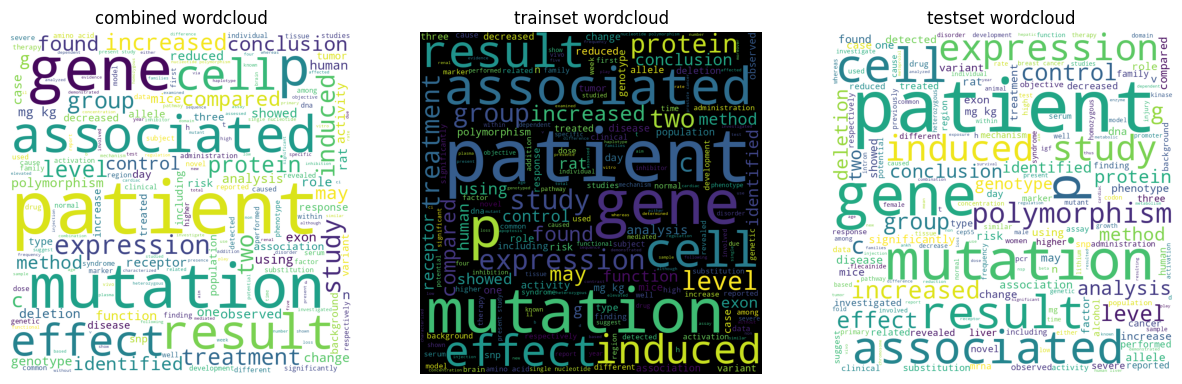

In [ ]:
plt.figure(figsize=(15,8), facecolor = None)

plt.subplot(1,3,1)
plt.imshow(complete_wordcloud)
plt.axis('off')
plt.title('combined wordcloud')

plt.subplot(1,3,2)
plt.imshow(train_wordcloud)
plt.axis('off')
plt.title('trainset wordcloud')

plt.subplot(1,3,3)
plt.imshow(test_wordcloud)
plt.axis('off')
plt.title('testset wordcloud')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/wordcloud.png')

plt.show()

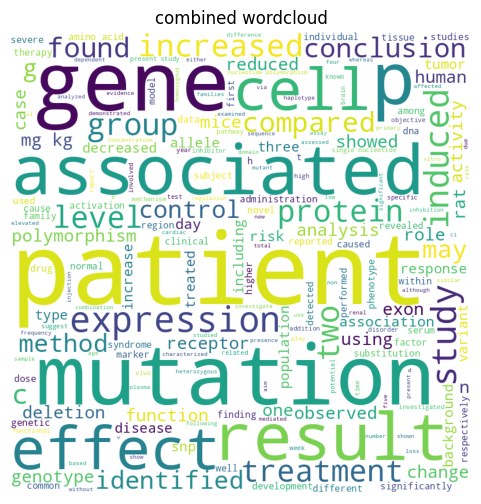

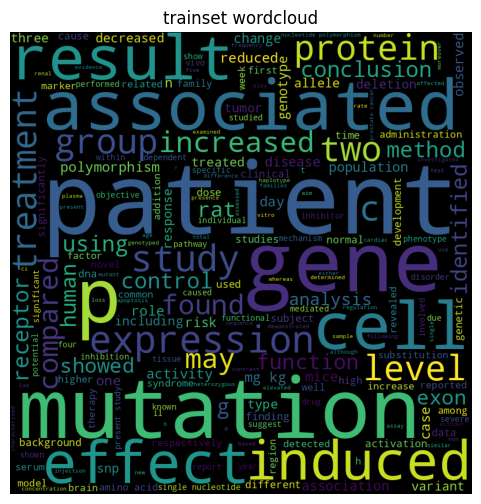

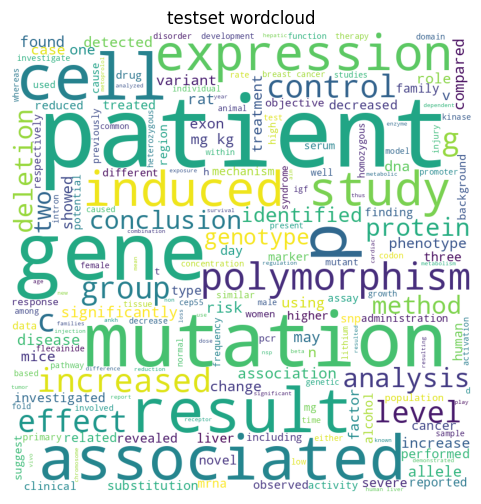

In [ ]:
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(complete_wordcloud)
plt.axis('off')
plt.title('combined wordcloud')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/combined wordcloud.jpg')

plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(train_wordcloud)
plt.axis('off')
plt.title('trainset wordcloud')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/trainset wordcloud.jpg')

plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(test_wordcloud)
plt.axis('off')
plt.title('testset wordcloud')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/testset wordcloud.jpg')

### n-grams

In [ ]:
from nltk.tokenize.sonority_sequencing import punctuation
#remove punctuation marks

def remove_punctuation(a_list):
  clean = ""
  for j in a_list:
    if j not in string.punctuation:
      clean += j

  return clean

In [ ]:
clean_abstracts = []
for art_abstract in tqdm(abstracts):
  clean_abstracts.append(remove_punctuation(art_abstract))

100%|██████████| 600/600 [00:00<00:00, 3353.11it/s]


In [ ]:
clean_train_abstracts = []
for art_abstract in tqdm(train_abstracts):
  clean_train_abstracts.append(remove_punctuation(art_abstract))

100%|██████████| 500/500 [00:00<00:00, 1536.01it/s]


In [ ]:
clean_test_abstracts = []
for art_abstract in tqdm(test_abstracts):
  clean_test_abstracts.append(remove_punctuation(art_abstract))

100%|██████████| 100/100 [00:00<00:00, 2546.06it/s]


In [ ]:
#genrateing the n-grams

def generate_ngrams(a_list, n=2):

  words = [word for word in a_list.split() if word not in set(stopwords.words('english'))]

  temp = zip(*[words[i:] for i in range(0,n)])

  n_grams = [" ".join(n) for n in temp]

  return n_grams

In [ ]:
bi_grams_all = defaultdict(int)

for art_abs in tqdm(clean_abstracts):
  for word in generate_ngrams(art_abs):
    bi_grams_all[word] += 1

100%|██████████| 600/600 [00:22<00:00, 27.02it/s]


In [ ]:
tri_grams_all = defaultdict(int)

for art_abs in tqdm(clean_abstracts):
  for word in generate_ngrams(art_abs, 3):
    tri_grams_all[word] += 1

100%|██████████| 600/600 [00:18<00:00, 32.32it/s]


In [ ]:
bi_grams_train = defaultdict(int)

for art_abs in tqdm(clean_train_abstracts):
  for word in generate_ngrams(art_abs):
    bi_grams_train[word] += 1

100%|██████████| 500/500 [00:15<00:00, 31.64it/s]


In [ ]:
tri_grams_train = defaultdict(int)

for art_abs in tqdm(clean_train_abstracts):
  for word in generate_ngrams(art_abs,3):
    tri_grams_train[word] += 1

100%|██████████| 500/500 [00:15<00:00, 31.58it/s]


In [ ]:
bi_grams_test = defaultdict(int)

for art_abs in tqdm(clean_test_abstracts):
  for word in generate_ngrams(art_abs):
    bi_grams_test[word] += 1

100%|██████████| 100/100 [00:03<00:00, 26.08it/s]


In [ ]:
tri_grams_test = defaultdict(int)

for art_abs in tqdm(clean_test_abstracts):
  for word in generate_ngrams(art_abs,3):
    tri_grams_test[word] += 1

100%|██████████| 100/100 [00:02<00:00, 37.57it/s]


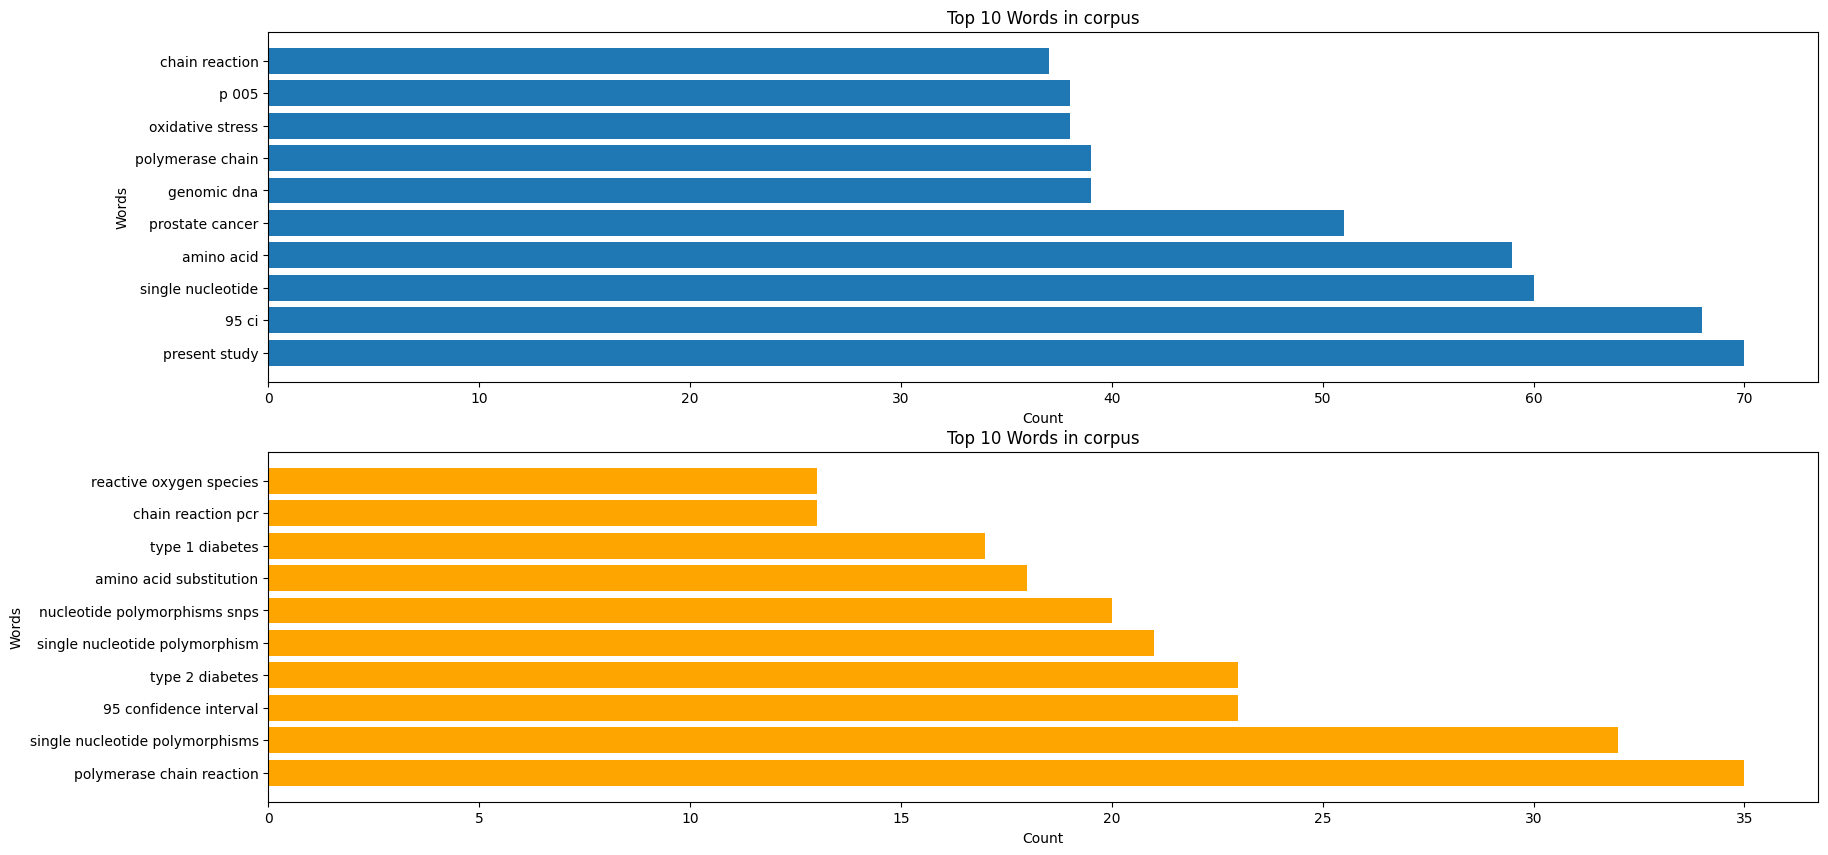

In [ ]:
df_bigrams_all = pd.DataFrame(sorted(bi_grams_all.items(), key=lambda x: x[1], reverse=True))
x_bigrams_all = df_bigrams_all[0][:10]
y_bigrams_all = df_bigrams_all[1][:10]

df_trigrams_all = pd.DataFrame(sorted(tri_grams_all.items(), key=lambda x: x[1], reverse=True))
x_trigrams_all = df_trigrams_all[0][:10]
y_trigrams_all = df_trigrams_all[1][:10]


plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.barh(x_bigrams_all, y_bigrams_all)
plt.title('Top 10 Words in corpus')
plt.ylabel('Words')
plt.xlabel('Count')

plt.subplot(2,1,2)
plt.barh(x_trigrams_all, y_trigrams_all, color='orange')
plt.title('Top 10 Words in corpus')
plt.ylabel('Words')
plt.xlabel('Count')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/all abstracts n-grams')
plt.show()

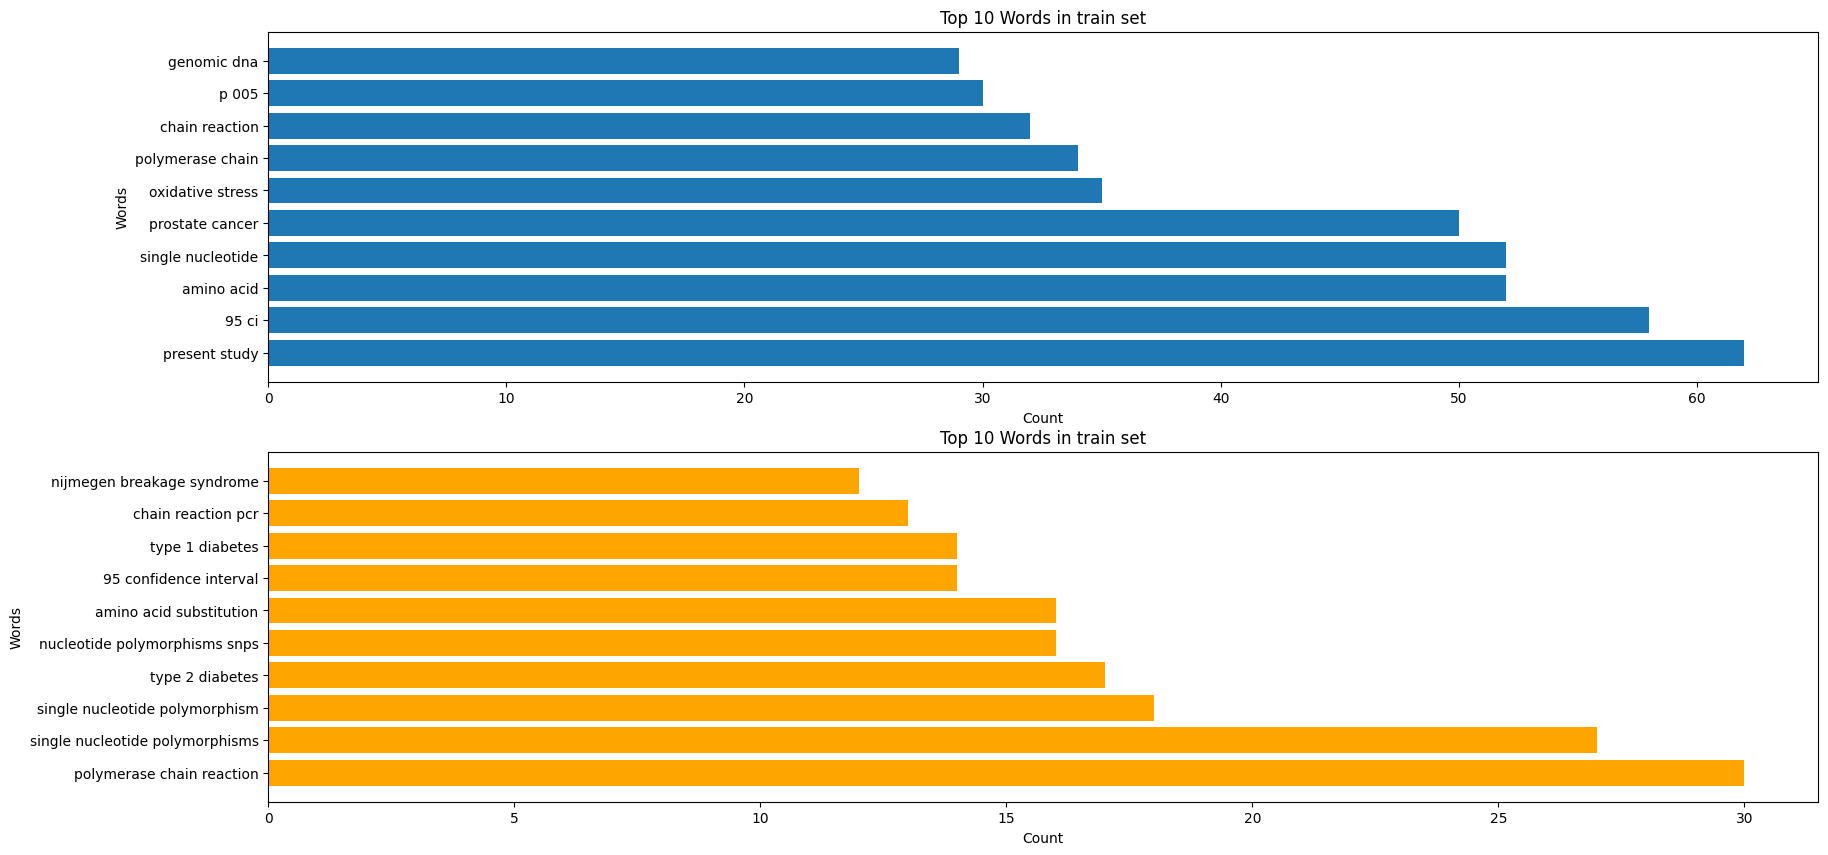

In [ ]:
df_bigrams_train = pd.DataFrame(sorted(bi_grams_train.items(), key=lambda x: x[1], reverse=True))
x_bigrams_train = df_bigrams_train[0][:10]
y_bigrams_train = df_bigrams_train[1][:10]

df_trigrams_train = pd.DataFrame(sorted(tri_grams_train.items(), key=lambda x: x[1], reverse=True))
x_trigrams_train = df_trigrams_train[0][:10]
y_trigrams_train = df_trigrams_train[1][:10]


plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.barh(x_bigrams_train, y_bigrams_train)
plt.title('Top 10 Words in train set')
plt.ylabel('Words')
plt.xlabel('Count')

plt.subplot(2,1,2)
plt.barh(x_trigrams_train, y_trigrams_train, color='orange')
plt.title('Top 10 Words in train set')
plt.ylabel('Words')
plt.xlabel('Count')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/trainset n-grams')
plt.show()

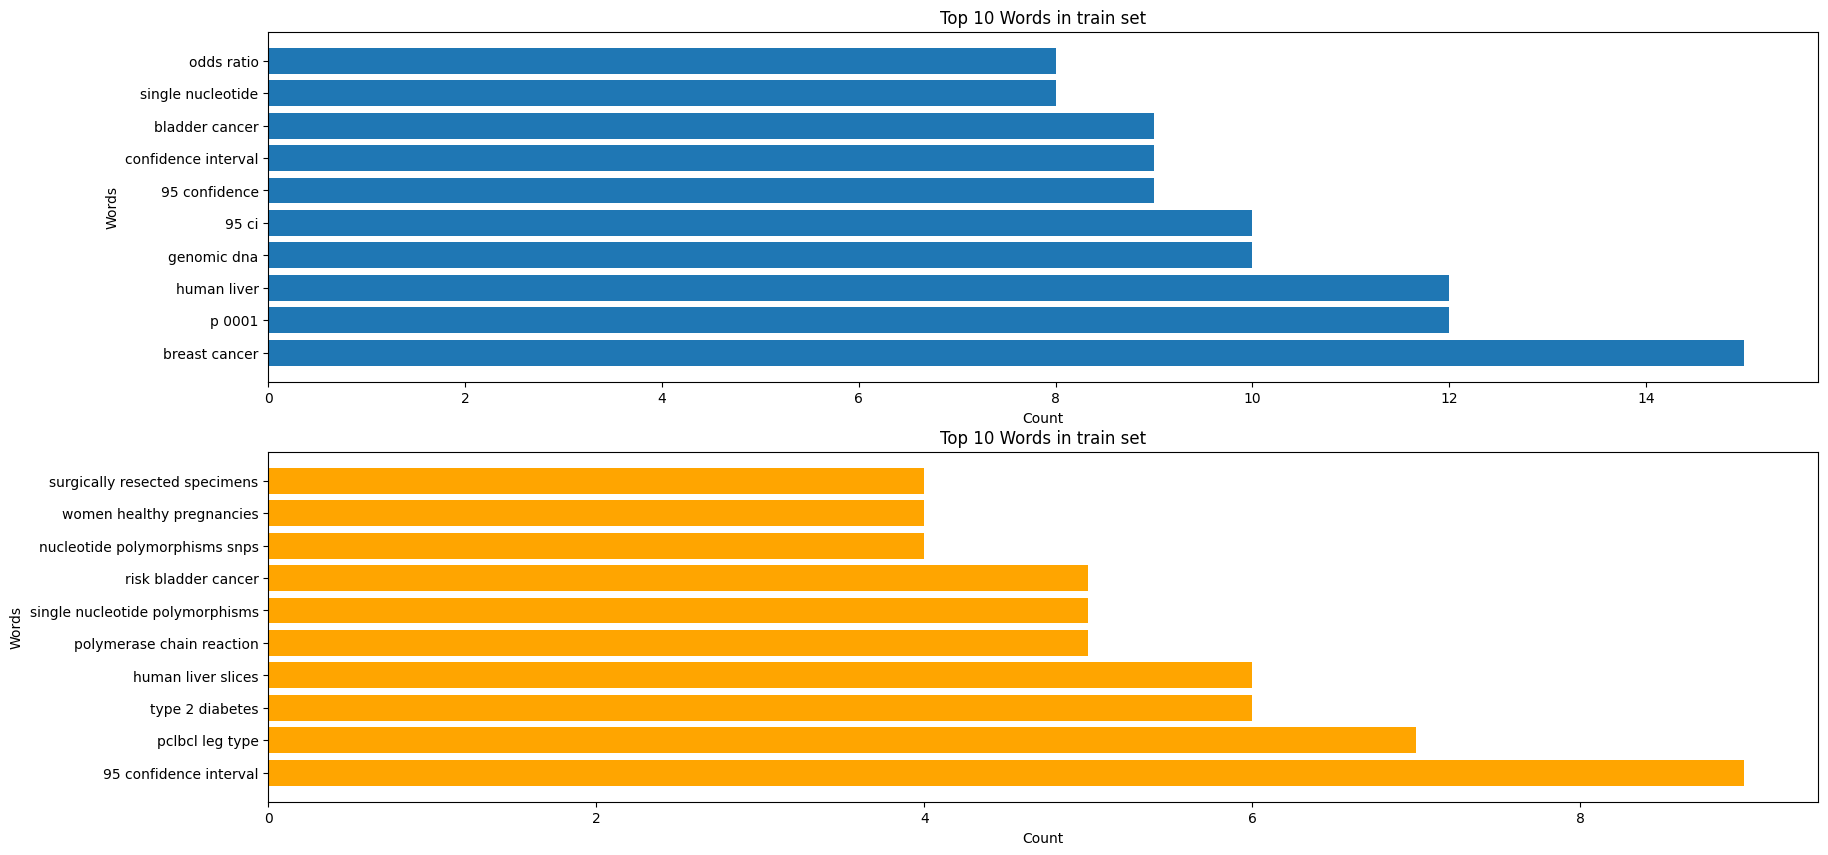

In [ ]:
df_bigrams_test = pd.DataFrame(sorted(bi_grams_test.items(), key=lambda x: x[1], reverse=True))
x_bigrams_test = df_bigrams_test[0][:10]
y_bigrams_test = df_bigrams_test[1][:10]

df_trigrams_test = pd.DataFrame(sorted(tri_grams_test.items(), key=lambda x: x[1], reverse=True))
x_trigrams_test = df_trigrams_test[0][:10]
y_trigrams_test = df_trigrams_test[1][:10]


plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.barh(x_bigrams_test, y_bigrams_test)
plt.title('Top 10 Words in test set')
plt.ylabel('Words')
plt.xlabel('Count')

plt.subplot(2,1,2)
plt.barh(x_trigrams_test, y_trigrams_test, color='orange')
plt.title('Top 10 Words in test set')
plt.ylabel('Words')
plt.xlabel('Count')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/testset n-grams')
plt.show()

### Unique entity mentions

In [ ]:
def get_unique_ents(a_list):

  #a dictionary of lists that will contain the names of the entities under thier types
  unique_ents = {labels[0]: [], labels[1]: [],
                 labels[2]: [], labels[3]: [],
                 labels[4]: [], labels[5]: []}

  for data_point in a_list:                              #iterate over every row
    an_abstract = data_point[0]
    for ents in data_point[1]['entities']:
      unique_ents[ents[-1]].append(an_abstract[ents[0]:ents[1]].upper())   #add the entity name to the correct label name

  for a_key, a_value in unique_ents.items():
    unique_ents[a_key] = list(set(a_value))             #get rid of duplicated items

  return unique_ents

In [ ]:
test_unique_ents = get_unique_ents(test_re)
train_unique_ents = get_unique_ents(train_re)

In [ ]:
full_dataset = [i for i in train_re]

for j in test_re:
  full_dataset.append(j)

combined_unique_ents = get_unique_ents(full_dataset)

In [ ]:
test_unique_ents_count = {a_key:len(a_value) for a_key, a_value in test_unique_ents.items()}
train_unique_ents_count = {a_key:len(a_value) for a_key, a_value in train_unique_ents.items()}
combined_unique_ents_count = {a_key:len(a_value) for a_key, a_value in combined_unique_ents.items()}

In [ ]:
unique_ents_count = px.bar(x=list(test_unique_ents_count.keys()), y=[list(test_unique_ents_count.values()),
                                                       list(train_unique_ents_count.values()),
                                                       list(combined_unique_ents_count.values())],
             barmode='group', labels = {'x': 'Entity', 'value': 'Count', 'variable': 'Dataset'},
             title = 'Count of unique entities per entity type', text_auto = True)

new_names = {'wide_variable_0': 'Test', 'wide_variable_1':'Train', 'wide_variable_2': 'Combined'}

unique_ents_count.for_each_trace(lambda t: t.update(name = new_names[t.name],
                                      legendgroup = new_names[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, new_names[t.name])))    #renaming the legend items

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/unique entity counts.jpg')
unique_ents_count.show()

<Figure size 640x480 with 0 Axes>

### The count of entity mentions per type

In [ ]:
train_ner_stats = dict(sorted(train_ner_stats.items()))
test_ner_stats = dict(sorted(test_ner_stats.items()))

In [ ]:
train_ents_stats = px.bar(x=train_ner_stats.keys(),
                          y=train_ner_stats.values(),
                          labels = {'x': 'Entity', 'y': 'Count'},
                          title = 'Distribution of entity types (trainset)',
                          text_auto = True)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/trainset entity stats.jpg')
train_ents_stats.show()

In [ ]:
test_ents_stats = px.bar(x=test_ner_stats.keys(),
                          y=test_ner_stats.values(),
                          labels = {'x': 'Entity', 'y': 'Count'},
                          title = 'Distribution of entity types (testset)',
                          text_auto = True)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/testset entity stats.jpg')
test_ents_stats.show()

In [ ]:
sorted_train_stats = [('train', ent, frq) for ent, frq in train_ner_stats.items()]
sorted_test_stats = [('test', ent, frq) for ent, frq in test_ner_stats.items()]
entity_stats = []
for i, j in zip(sorted_train_stats, sorted_test_stats):
  entity_stats.append(i)
  entity_stats.append(j)

df_entity_stats = pd.DataFrame(entity_stats, columns = ['Set', 'Entity', 'Count'])


In [ ]:
entity_stats_1 = px.bar(df_entity_stats, x='Entity', y='Count', color='Set',
                        title = 'Distribution of entity types', text_auto=True)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/combined entity stats 1.jpg')
entity_stats_1.show()

In [ ]:
entity_stats_2 = px.bar(df_entity_stats, x='Set', y='Count', color='Entity',
                        title = 'Distribution of entity types', text_auto=True)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/combined entity stats 2.jpg')
entity_stats_2.show()

### Count of relations

In [ ]:
train_re_stats = dict(sorted(train_re_stats.items()))
test_re_stats = dict(sorted(test_re_stats.items()))

In [ ]:
train_rels_stats = px.bar(x=train_re_stats.keys(),
                          y=train_re_stats.values(),
                          labels = {'x': 'Relation', 'y': 'Count'},
                          title = 'Distribution of relationship types (trainset)',
                          text_auto = True)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/trainset relations stats.jpg')
train_rels_stats.show()

In [ ]:
test_rels_stats = px.bar(x=test_re_stats.keys(),
                          y=test_re_stats.values(),
                          labels = {'x': 'Relation', 'y': 'Count'},
                          title = 'Distribution of relationship types (testset)',
                          text_auto = True)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/testset relations stats.jpg')
test_rels_stats.show()

In [ ]:
sorted_train_stats_2 = [('train', rel, frq) for rel, frq in train_re_stats.items()]
sorted_test_stats_2 = [('test', rel, frq) for rel, frq in test_re_stats.items()]
relation_stats = []
for k, l in zip(sorted_train_stats_2, sorted_test_stats_2):
  relation_stats.append(k)
  relation_stats.append(l)

df_relation_stats = pd.DataFrame(relation_stats, columns = ['Set', 'Relation', 'Count'])

In [ ]:
relation_stats_1 = px.bar(df_relation_stats, x='Relation', y='Count', color='Set',
                          text_auto=True, title = 'Distribution of relation types')

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/combined relations stats 1.jpg')
relation_stats_1.show()

In [ ]:
relation_stats_2 = px.bar(df_relation_stats, x='Set', y='Count', color='Relation',
                          text_auto=True, title = 'Distribution of relation types')

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/combined relations stats 2.jpg')
relation_stats_2.show()

### Distributions of the length of the abstracts

In [ ]:
len_abstracts = [len(i.split()) for i in abstracts]
len_train_abstracts = [len(j.split()) for j in train_abstracts]
len_test_abstracts = [len(k.split()) for k in test_abstracts]

In [ ]:
max_all = max(len_abstracts)
max_train = max(len_train_abstracts)
max_test = max(len_test_abstracts)

min_all = min(len_abstracts)
min_train = min(len_train_abstracts)
min_test = min(len_test_abstracts)

In [ ]:
print('The shortest document in the combined dataset is {} words long, while the longest document is {} words long'.format(min_all, max_all))
print('The shortest document in the train dataset is {} words long, while the longest document is {} words long'.format(min_train, max_train))
print('The shortest document in the train dataset is {} words long, while the longest document is {} words long'.format(min_test, max_test))

The shortest document in the combined dataset is 34 words long, while the longest document is 466 words long
The shortest document in the train dataset is 34 words long, while the longest document is 466 words long
The shortest document in the train dataset is 65 words long, while the longest document is 348 words long


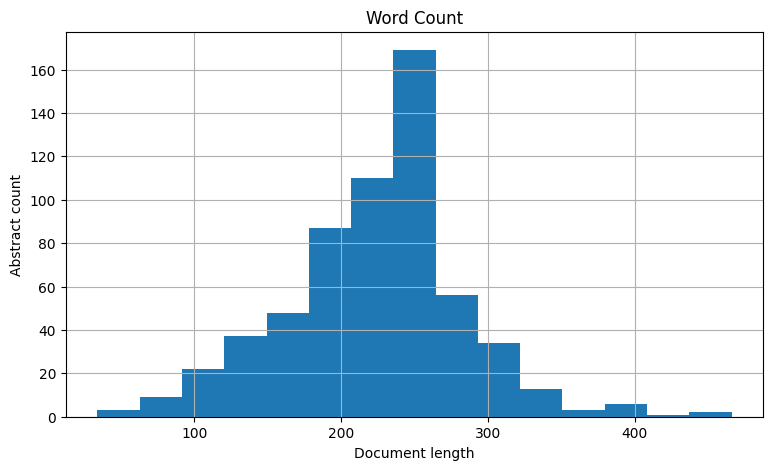

In [ ]:
pd.DataFrame(len_abstracts, columns=['Word Count']).hist(bins=15, figsize=(9,5))
pl.xlabel('Document length')
pl.ylabel('Abstract count')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/all_abstracts word count distribution.jpg')

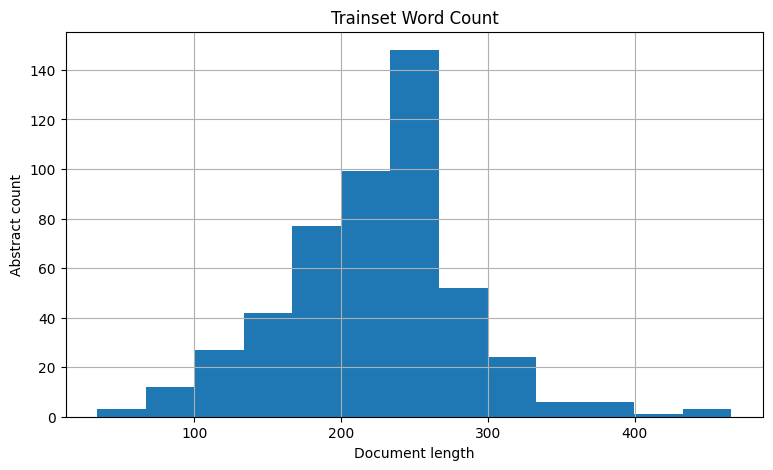

In [ ]:
pd.DataFrame(len_train_abstracts, columns=['Trainset Word Count']).hist(bins=13, figsize=(9,5))
pl.xlabel('Document length')
pl.ylabel('Abstract count')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/train_abstracts word count distribution.jpg')

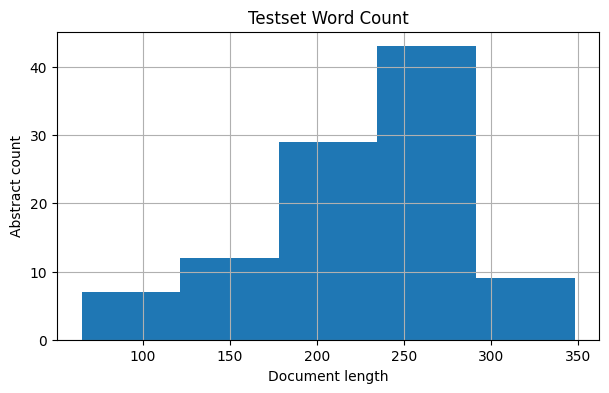

In [ ]:
pd.DataFrame(len_test_abstracts, columns=['Testset Word Count']).hist(bins=5, figsize=(7,4))
pl.xlabel('Document length')
pl.ylabel('Abstract count')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/figures/test_abstracts word count distribution.jpg')

## SpaCy (v3) NER and RE training

In [ ]:
# nlp = spacy.blank('en')   #loads a new spacy model
# doc_bin = DocBin()        #instantiate the DocBin

In [ ]:
# #building the training dataset in a spacy format

# for example_train in tqdm(train_ner):

#   abstract = example_train[0]              #get the abstract
#   annotations = example_train[1]['entities']    #get the annotations

#   doc = nlp.make_doc(abstract)             #convert the abstract to doc format
#   ents = []                                #list to hold entities

#   for span_start, span_end, label in annotations:

#     span = doc.char_span(span_start, span_end, label = label, alignment_mode = 'contract')   #create span from annotations

#     if span is None:
#       print('Skipping entity')

#     else:
#       ents.append(span)

#   filtered_ents = filter_spans(ents)      #filter duplicates
#   doc.ents = filtered_ents
#   doc_bin.add(doc)

# doc_bin.to_disk('train.spacy')


 16%|█▋        | 66/400 [00:00<00:00, 656.87it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping


 46%|████▋     | 186/400 [00:00<00:00, 517.99it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping


 71%|███████   | 283/400 [00:00<00:00, 382.41it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping


 81%|████████  | 324/400 [00:00<00:00, 352.48it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity



100%|██████████| 400/400 [00:01<00:00, 373.18it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


In [ ]:
# #building the dev dataset in a spacy format

# for example_train in tqdm(dev_ner):

#   abstract = example_train[0]              #get the abstract
#   annotations = example_train[1]['entities']    #get the annotations

#   doc = nlp.make_doc(abstract)             #convert the abstract to doc format
#   ents = []                                #list to hold entities

#   for span_start, span_end, label in annotations:

#     span = doc.char_span(span_start, span_end, label = label, alignment_mode = 'contract')   #create span from annotations

#     if span is None:
#       print('Skipping entity')

#     else:
#       ents.append(span)

#   filtered_ents = filter_spans(ents)      #filter duplicates
#   doc.ents = filtered_ents
#   doc_bin.add(doc)

# doc_bin.to_disk('dev.spacy')


 39%|███▉      | 39/100 [00:00<00:00, 387.87it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity



100%|██████████| 100/100 [00:00<00:00, 322.78it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


In [ ]:
# #building the test dataset in a spacy format

# for example_train in tqdm(test_ner):

#   abstract = example_train[0]              #get the abstract
#   annotations = example_train[1]['entities']    #get the annotations

#   doc = nlp.make_doc(abstract)             #convert the abstract to doc format
#   ents = []                                #list to hold entities

#   for span_start, span_end, label in annotations:

#     span = doc.char_span(span_start, span_end, label = label, alignment_mode = 'contract')   #create span from annotations

#     if span is None:                       #checks whether span is valid
#       print('Skipping entity')

#     else:
#       ents.append(span)

#   filtered_ents = filter_spans(ents)      #filter duplicates
#   doc.ents = filtered_ents
#   doc_bin.add(doc)

# doc_bin.to_disk('test.spacy')


 35%|███▌      | 35/100 [00:00<00:00, 348.40it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity



100%|██████████| 100/100 [00:00<00:00, 322.89it/s]


Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


In [ ]:
#ref spacy for the config file
#run the init fill-config to fill the base config and generate the config file as needed

#!python -m spacy init fill-config '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/base_config.cfg' '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/config.cfg'

2023-07-24 11:36:13.605025: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy
datasets/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
#!python -m spacy init fill-config '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/base_config2.cfg' '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/config2.cfg'

2023-07-24 12:21:59.828175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy
datasets/config2.cfg
You can now add your data and train your pipeline:
python -m spacy train config2.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
#modify batch size for training in new config file under NLP, begins at 20
#modify max epochs under training, begins at 15

#training the model

#!python -m spacy train '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/config.cfg' --output ./ --paths.train '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/train.spacy' --paths.dev '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/dev.spacy'

2023-07-24 12:09:11.603057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2023-07-24 12:09:18,301] [INFO] Set up nlp object from config
[2023-07-24 12:09:18,336] [INFO] Pipeline: ['tok2vec', 'ner']
[2023-07-24 12:09:18,344] [INFO] Created vocabulary
[2023-07-24 12:09:24,745] [INFO] Added vectors: en_core_web_lg
[2023-07-24 12:09:24,746] [INFO] Finished initializing nlp object
[2023-07-24 12:11:49,581] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
^C


In [ ]:
#!python -m spacy train '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/config2.cfg' --output ./ --paths.train '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/train.spacy' --paths.dev '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/dev.spacy'

2023-07-24 12:22:37.437691: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2023-07-24 12:22:41,588] [INFO] Set up nlp object from config
[2023-07-24 12:22:41,612] [INFO] Pipeline: ['tok2vec', 'ner', 'parser']
[2023-07-24 12:22:41,618] [INFO] Created vocabulary
[2023-07-24 12:22:47,842] [INFO] Added vectors: en_core_web_lg
[2023-07-24 12:22:47,843] [INFO] Finished initializing nlp object
[2023-07-24 12:28:32,382] [INFO] Initialized pipeline components: ['tok2vec', 'ner', 'parser']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner', 'parser']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  LOSS PARSER  ENTS_F  ENTS_P  ENTS_R  DEP_UAS  DEP_LAS  SENTS_F  SCORE 
---  ------  ------------  --------  -----------  ------  -----

In [ ]:
#!pip install spacy[transformers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.9 MB/s eta 0:00:00


In [ ]:
#!python -m spacy init fill-config '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/base_configT.cfg' '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/configT.cfg'

2023-07-24 12:37:11.585848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 12:37:14.966769: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-24 12:37:16.556511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-24 12:37:16.556966: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
#!python -m spacy train '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/configT.cfg' --output ./ --paths.train '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/train.spacy' --paths.dev '/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/spacy datasets/dev.spacy' --gpu-id 0

2023-07-24 12:42:56.374564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 12:42:58.614599: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-24 12:43:02.722367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-24 12:43:02.726482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

## SpaCy (v2) training

In [ ]:
model = None
model_name = 'BioNER'

In [ ]:
n_iter = 60

In [ ]:
random.seed(0)

if model is not None:
  nlp = spacy.load(model)    #load existing model
  print("Loading model '%s'" %model)

else:
  nlp = spacy.blank('en')    #create blank language model class
  print("created blank English model")

created blank English model


In [ ]:
#add ner to pipeline

if 'ner' not in nlp.pipe_names:
  ner = nlp.create_pipe('ner')
  nlp.add_pipe(ner)

else:
  ner = nlp.get_pipe('ner')

In [ ]:
labels

['GENEORGENEPRODUCT',
 'DISEASEORPHENOTYPICFEATURE',
 'CHEMICALENTITY',
 'ORGANISMTAXON',
 'SEQUENCEVARIANT',
 'CELLLINE']

In [ ]:
#add labels to the ner module

ner.add_label(labels[0])
ner.add_label(labels[1])
ner.add_label(labels[2])
ner.add_label(labels[3])
ner.add_label(labels[4])
ner.add_label(labels[5])

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!pip install spacy-lookups-data

In [ ]:
#define optimizer

if model is None:
  optimizer = nlp.begin_training()
else:
  optimizer = nlp.resume_training()


move_names = list(ner.move_names)

#pipe names to not affect

pipe_exceptions = ['ner', 'trf_wordpiecer', 'trf_tok2vec']
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

/usr/local/lib/python3.10/dist-packages/spacy/language.py:635: UserWarning:

[W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.



In [ ]:
#training the ner module

rates = []

with nlp.disable_pipes(*other_pipes), warnings.catch_warnings():

  warnings.filterwarnings('once', category=UserWarning, module='spacy')   #show a misaglignment warning once only

  sizes = compounding(2.0, 125.0, 1.001)     #start, stop, compounding factor

  for itn in tqdm(range(n_iter)):

    random.shuffle(TRAIN_DATA)
    batches = minibatch(TRAIN_DATA, sizes)
    losses = {}

    for batch in batches:
      texts, annotations = zip(*batch)
      # for text, annotation in batch:
      #   doc = nlp.make_doc(text)
      #   example = Example.from_dict(doc, annotation)

      #   nlp.update([example], sgd = optimizer, drop = 0.31, losses=losses)
      nlp.update(texts, annotations, sgd = optimizer, drop = 0.35, losses=losses)
    rates.append([losses['ner']])

    print('Losses :', losses)


  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Histamine regulates functions via four receptors (..." with entities "[(0, 9, 'CHEMICALENTITY'), (50, 54, 'GENEORGENEPRO...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "OBJECTIVES: SLCO1B1*5 and SLCO1B1*15 have been rep..." with entities "[(12, 19, 'GENEORGENEPRODUCT'), (26, 33, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could no

Losses : {'ner': 26653.219131821996}


  3%|▎         | 2/60 [00:46<21:37, 22.38s/it]

Losses : {'ner': 18197.68443095646}


  5%|▌         | 3/60 [01:04<19:26, 20.47s/it]

Losses : {'ner': 15539.136378217927}


  7%|▋         | 4/60 [01:20<17:43, 18.99s/it]

Losses : {'ner': 12960.090240224217}


  8%|▊         | 5/60 [01:37<16:43, 18.24s/it]

Losses : {'ner': 11552.974350217204}


 10%|█         | 6/60 [01:53<15:38, 17.38s/it]

Losses : {'ner': 10305.447301375028}


 12%|█▏        | 7/60 [02:09<14:49, 16.78s/it]

Losses : {'ner': 10409.562947876504}


 13%|█▎        | 8/60 [02:25<14:23, 16.60s/it]

Losses : {'ner': 8810.978593368214}


 15%|█▌        | 9/60 [02:40<13:39, 16.06s/it]

Losses : {'ner': 8125.439769039505}


 17%|█▋        | 10/60 [02:54<13:00, 15.60s/it]

Losses : {'ner': 8557.713525712825}


 18%|█▊        | 11/60 [03:09<12:26, 15.24s/it]

Losses : {'ner': 7653.151247827391}


 20%|██        | 12/60 [03:23<11:54, 14.89s/it]

Losses : {'ner': 7078.638399305972}


 22%|██▏       | 13/60 [03:37<11:27, 14.63s/it]

Losses : {'ner': 7129.37497102115}


 23%|██▎       | 14/60 [03:51<11:04, 14.45s/it]

Losses : {'ner': 6575.603511778749}


 25%|██▌       | 15/60 [04:05<10:42, 14.28s/it]

Losses : {'ner': 6326.008186707789}


 27%|██▋       | 16/60 [04:18<10:19, 14.08s/it]

Losses : {'ner': 6308.182867176816}


 28%|██▊       | 17/60 [04:32<09:57, 13.91s/it]

Losses : {'ner': 6145.163413076763}


 30%|███       | 18/60 [04:45<09:37, 13.74s/it]

Losses : {'ner': 6800.95875842488}


 32%|███▏      | 19/60 [04:59<09:21, 13.70s/it]

Losses : {'ner': 6321.545457170811}


 33%|███▎      | 20/60 [05:12<09:03, 13.58s/it]

Losses : {'ner': 5400.959905812376}


 35%|███▌      | 21/60 [05:26<08:53, 13.69s/it]

Losses : {'ner': 5473.236636903457}


 37%|███▋      | 22/60 [05:40<08:38, 13.63s/it]

Losses : {'ner': 5316.647229895112}


 38%|███▊      | 23/60 [05:53<08:22, 13.57s/it]

Losses : {'ner': 5223.106367293221}


 40%|████      | 24/60 [06:07<08:13, 13.70s/it]

Losses : {'ner': 4947.937363047844}


 42%|████▏     | 25/60 [06:21<08:04, 13.84s/it]

Losses : {'ner': 4494.481383409351}


 43%|████▎     | 26/60 [06:35<07:55, 13.99s/it]

Losses : {'ner': 4525.392109613458}


 45%|████▌     | 27/60 [06:49<07:41, 13.97s/it]

Losses : {'ner': 4445.139923441224}


 47%|████▋     | 28/60 [07:03<07:27, 13.97s/it]

Losses : {'ner': 4410.3609007581545}


 48%|████▊     | 29/60 [07:17<07:13, 13.98s/it]

Losses : {'ner': 4691.336264985555}


 50%|█████     | 30/60 [07:31<06:57, 13.90s/it]

Losses : {'ner': 4606.029460590333}


 52%|█████▏    | 31/60 [07:45<06:40, 13.82s/it]

Losses : {'ner': 4759.20071350463}


 53%|█████▎    | 32/60 [07:59<06:30, 13.95s/it]

Losses : {'ner': 4367.581042828962}


 55%|█████▌    | 33/60 [08:13<06:21, 14.12s/it]

Losses : {'ner': 4308.590298237052}


 57%|█████▋    | 34/60 [08:27<06:04, 14.03s/it]

Losses : {'ner': 4109.101870186714}


 58%|█████▊    | 35/60 [08:41<05:48, 13.95s/it]

Losses : {'ner': 4120.497549536522}


 60%|██████    | 36/60 [08:55<05:32, 13.86s/it]

Losses : {'ner': 4374.110313698184}


 62%|██████▏   | 37/60 [09:09<05:18, 13.86s/it]

Losses : {'ner': 4168.06508778414}


 63%|██████▎   | 38/60 [09:22<05:04, 13.84s/it]

Losses : {'ner': 3963.615636602626}


 65%|██████▌   | 39/60 [09:36<04:49, 13.77s/it]

Losses : {'ner': 5096.871149987552}


 67%|██████▋   | 40/60 [09:49<04:32, 13.61s/it]

Losses : {'ner': 3874.783481061633}


 68%|██████▊   | 41/60 [10:03<04:19, 13.66s/it]

Losses : {'ner': 3717.497750409646}


 70%|███████   | 42/60 [10:16<04:03, 13.55s/it]

Losses : {'ner': 3810.2705049454235}


 72%|███████▏  | 43/60 [10:30<03:49, 13.49s/it]

Losses : {'ner': 3582.875333770411}


 73%|███████▎  | 44/60 [10:43<03:34, 13.44s/it]

Losses : {'ner': 3810.4748290092975}


 75%|███████▌  | 45/60 [10:57<03:22, 13.48s/it]

Losses : {'ner': 4345.969019868644}


 77%|███████▋  | 46/60 [11:10<03:10, 13.60s/it]

Losses : {'ner': 3546.5412321230397}


 78%|███████▊  | 47/60 [11:24<02:56, 13.60s/it]

Losses : {'ner': 3386.7061088941264}


 80%|████████  | 48/60 [11:37<02:42, 13.55s/it]

Losses : {'ner': 2971.531885942444}


 82%|████████▏ | 49/60 [11:51<02:29, 13.58s/it]

Losses : {'ner': 2984.206672633416}


 83%|████████▎ | 50/60 [12:05<02:15, 13.54s/it]

Losses : {'ner': 3382.8545313682407}


 85%|████████▌ | 51/60 [12:18<02:01, 13.54s/it]

Losses : {'ner': 3210.1873912869487}


 87%|████████▋ | 52/60 [12:32<01:48, 13.60s/it]

Losses : {'ner': 3103.3901660765987}


 88%|████████▊ | 53/60 [12:46<01:35, 13.63s/it]

Losses : {'ner': 3205.492467002943}


 90%|█████████ | 54/60 [12:59<01:21, 13.63s/it]

Losses : {'ner': 3068.40865776268}


 92%|█████████▏| 55/60 [13:12<01:07, 13.51s/it]

Losses : {'ner': 2888.0702708386816}


 93%|█████████▎| 56/60 [13:26<00:54, 13.51s/it]

Losses : {'ner': 2992.472157825745}


 95%|█████████▌| 57/60 [13:40<00:40, 13.54s/it]

Losses : {'ner': 2836.2428633233067}


 97%|█████████▋| 58/60 [13:53<00:27, 13.52s/it]

Losses : {'ner': 3193.2206208626703}


 98%|█████████▊| 59/60 [14:06<00:13, 13.40s/it]

Losses : {'ner': 2835.4191810428165}


100%|██████████| 60/60 [14:20<00:00, 14.33s/it]

Losses : {'ner': 2892.546491380781}


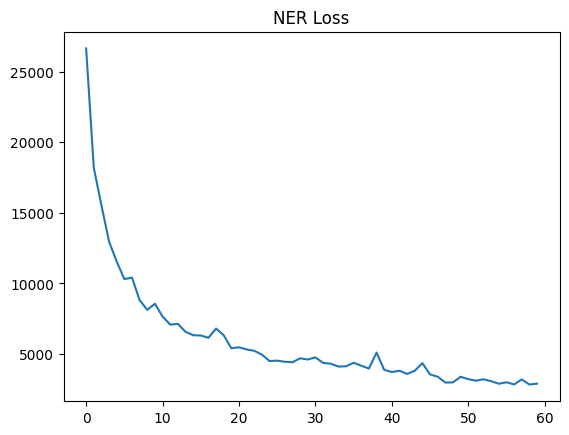

In [ ]:
plt.plot(rates)
plt.title('NER Loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/original model loss.jpg')
plt.show()

In [ ]:
test_idx_1 = random.randint(0,len(TEST_DATA))
test_idx_2 = random.randint(0,len(TEST_DATA))
print("Testing on abstract %.f in test dataset" %test_idx_1)

Testing on abstract 95 in test dataset


In [ ]:
doc = nlp(TEST_DATA[test_idx_1][0])
print("Entities in the '%s'" %TEST_DATA[test_idx_1][0])

for ent in doc.ents:
  print(ent.label_, ' >>>>', ent.text)

Entities in the 'BACKGROUND/AIMS: Interleukin-12 (IL-12) governs the Th1-type immune response, affecting the spontaneous and treatment-induced recovery from HCV-infection. We investigated whether the IL12B polymorphisms within the promoter region (4 bp insertion/deletion) and the 3'-UTR (1188-A/C), which have been reported to influence IL-12 synthesis, are associated with the outcome of HCV infection. METHODS: We analyzed 186 individuals with spontaneous HCV clearance, 501 chronically HCV infected patients, and 217 healthy controls. IL12B 3'-UTR and promoter genotyping was performed by Taqman-based assays with allele-specific oligonucleotide probes and PCR-based allele-specific DNA-amplification, respectively. RESULTS: The proportion of IL12B promoter and 3'-UTR genotypes did not differ significantly between the different cohorts. However, HCV genotype 1-infected patients with high baseline viremia carrying the IL12B 3'-UTR 1188-C-allele showed significantly higher sustained virologic 

In [ ]:
output_dir = Path('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/models')

In [ ]:
if output_dir is not None:
  output_dir = Path(output_dir)
  if not output_dir.exists():
    output_dir.mkdir()

  nlp.meta['name'] = model_name    #renaming model
  nlp.to_disk(output_dir)
  print('Model is saved to: ', output_dir)

Model is saved to:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/models


In [ ]:
print("Testing on abstract %.f in test dataset" %test_idx_2)

Testing on abstract 29 in test dataset


In [ ]:
#testing the saved model

print('Loading model from: ', output_dir)

nlp_2 = spacy.load(output_dir)
#assert nlp_2.get_pipe('ner').move_names == move_names

doc_2 = nlp_2(TEST_DATA[test_idx_2][0])

for ent in doc_2.ents:
  print(ent.label_, '>>>>', ent.text)

Loading model from:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/models
GENEORGENEPRODUCT >>>> HH
SEQUENCEVARIANT >>>> N372H
GENEORGENEPRODUCT >>>> BRCA2
DISEASEORPHENOTYPICFEATURE >>>> breast and ovarian cancer
DISEASEORPHENOTYPICFEATURE >>>> sporadic cancer
SEQUENCEVARIANT >>>> N372H
SEQUENCEVARIANT >>>> 203G > A
GENEORGENEPRODUCT >>>> BRCA2
DISEASEORPHENOTYPICFEATURE >>>> breast or ovarian cancer
GENEORGENEPRODUCT >>>> BRCA1
ORGANISMTAXON >>>> women
GENEORGENEPRODUCT >>>> BRCA1
GENEORGENEPRODUCT >>>> BRCA2
DISEASEORPHENOTYPICFEATURE >>>> breast cancer
GENEORGENEPRODUCT >>>> BRCA1
DISEASEORPHENOTYPICFEATURE >>>> ovarian cancer
SEQUENCEVARIANT >>>> N372H
SEQUENCEVARIANT >>>> 203A
SEQUENCEVARIANT >>>> N372H
GENEORGENEPRODUCT >>>> BRCA1
DISEASEORPHENOTYPICFEATURE >>>> cancer
GENEORGENEPRODUCT >>>> BRCA1
SEQUENCEVARIANT >>>> N372H


In [ ]:
colors = {labels[0]: "#BBFA42", labels[1]: "#F3B7D3", labels[2]: "#F76D3E", labels[3]: "#F67DE3", labels[4]: "#CCDDEE", labels[5]: "#A6677E"}
options = {"colors": colors}

spacy.displacy.render(doc_2, style = 'ent', options = options, jupyter = True)

In [ ]:
#warnings.filterwarnings()

scorer = Scorer()

for input_, annotation in tqdm(TEST_DATA):
  doc_gold_text = nlp_2.make_doc(input_)
  #gold_example = Example.from_dict(doc_gold_text, {'entities': annotation['entities']})
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
  pred_val = nlp_2(input_)
  scorer.score(pred_val, gold_example)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-39-5210234fc185>:8: UserWarning: [W030] Some entities could not be aligned in the text "OBJECTIVE: Congenital long QT syndrome (LQTS) with..." with entities "[(22, 38, 'DISEASEORPHENOTYPICFEATURE'), (40, 44, ...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
<ipython-input-39-5210234fc185>:8: UserWarning: [W030] Some entities could not be aligned in the text "As a primary target for opioid drugs and peptides,..." with entities "[(55, 73, 'GENEORGENEPRODUCT'), (75, 80, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
  3%|▎     

In [ ]:
scorer.scores

{'uas': 0.0,
 'las': 0.0,
 'las_per_type': {'': {'p': 0.0, 'r': 0.0, 'f': 0.0}},
 'ents_p': 78.1317494600432,
 'ents_r': 71.63366336633663,
 'ents_f': 74.74173553719008,
 'ents_per_type': {'DISEASEORPHENOTYPICFEATURE': {'p': 70.67395264116576,
   'r': 65.76271186440678,
   'f': 68.12993854258121},
  'ORGANISMTAXON': {'p': 98.6784140969163,
   'r': 96.13733905579399,
   'f': 97.3913043478261},
  'SEQUENCEVARIANT': {'p': 85.90604026845638,
   'r': 71.50837988826815,
   'f': 78.04878048780488},
  'CHEMICALENTITY': {'p': 78.35616438356165,
   'r': 71.3216957605985,
   'f': 74.67362924281986},
  'GENEORGENEPRODUCT': {'p': 74.86437613019892,
   'r': 68.54304635761589,
   'f': 71.56439066551427},
  'CELLLINE': {'p': 77.77777777777779,
   'r': 53.84615384615385,
   'f': 63.63636363636363}},
 'tags_acc': 0.0,
 'token_acc': 100.0,
 'textcat_score': 0.0,
 'textcats_per_cat': {}}

In [ ]:
def extract_scores(some_scores):
  model_scores = {}
  model_scores['Metric'] = ['Precision Score', 'Recall Score', 'F1 Score']

  model_scores['OVERALL'] = [round(some_scores['ents_p'],4),
                             round(some_scores['ents_r'],4),
                             round(some_scores['ents_f'],4)]

  for a_key in some_scores['ents_per_type']:
    model_scores[a_key] = []
    for a_metric in some_scores['ents_per_type'][a_key].keys():
      model_scores[a_key].append(round(some_scores['ents_per_type'][a_key][a_metric],4))

  return model_scores

In [ ]:
line_colors = {'OVERALL':'black', 'CHEMICALENTITY': 'yellow',
                'GENEORGENEPRODUCT':'blue', 'CELLLINE': 'orange',
                'SEQUENCEVARIANT': 'red', 'ORGANISMTAXON': 'brown',
                'DISEASEORPHENOTYPICFEATURE': 'green'}

line_labels = {'value': 'Score (%)', 'variable': 'Type'}

In [ ]:
bench_scores = extract_scores(scorer.scores)
bench_scores

{'Metric': ['Precision Score', 'Recall Score', 'F1 Score'],
 'OVERALL': [78.1317, 71.6337, 74.7417],
 'DISEASEORPHENOTYPICFEATURE': [70.674, 65.7627, 68.1299],
 'ORGANISMTAXON': [98.6784, 96.1373, 97.3913],
 'SEQUENCEVARIANT': [85.906, 71.5084, 78.0488],
 'CHEMICALENTITY': [78.3562, 71.3217, 74.6736],
 'GENEORGENEPRODUCT': [74.8644, 68.543, 71.5644],
 'CELLLINE': [77.7778, 53.8462, 63.6364]}

In [ ]:
pd.DataFrame(bench_scores).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/benchmark.csv')

In [ ]:
bench_performance = px.line(pd.DataFrame(bench_scores), x = 'Metric',
                         y = list(bench_scores.keys())[1:], markers = True,
                            title = 'Performance under benchmark trainig data',
                            labels = line_labels, color_discrete_map = line_colors)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/benchmark performance.jpg')
bench_performance.show()

## Experiments with varying batch sizes, drop out rate and irrelevant examples

In [ ]:
n_iter = 60

### Experiment with common phrases (irrelevant examples) appended to the training data

In [ ]:
en_phrases = []

with open('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/common phrases.txt', 'r') as my_file:
  for i in range(537):
    en_phrases.append(my_file.readline())

#remove the new line character
clean_phrases = [en_phrases[x].strip() for x in range(len(en_phrases))]

#remove duplicated phrases and shuffle the list
clean_phrases = list(set(clean_phrases))
random.shuffle(clean_phrases)

#create a list of 500 clean, non-duplicate english phrases
common_phrases = clean_phrases[0:500]

In [ ]:
CP_TRAIN_DATA = []

for i in range(500):
  CP_TRAIN_DATA.append(TRAIN_DATA[i])
  CP_TRAIN_DATA.append((common_phrases[i], {'entities': []}))

In [ ]:
cp_model = None
cp_model_name = 'CPBioNER'

random.seed(0)

if cp_model is not None:
  cp_nlp = spacy.load(cp_model)    #load existing model
  print("Loading model '%s'" %cp_model)

else:
  cp_nlp = spacy.blank('en')    #create blank language model class
  print("created blank English model")

#add ner to pipeline

if 'ner' not in cp_nlp.pipe_names:
  cp_ner = cp_nlp.create_pipe('ner')
  cp_nlp.add_pipe(cp_ner)

else:
  cp_ner = cp_nlp.get_pipe('ner')

created blank English model


In [ ]:
#add labels to the ner module

cp_ner.add_label(labels[0])
cp_ner.add_label(labels[1])
cp_ner.add_label(labels[2])
cp_ner.add_label(labels[3])
cp_ner.add_label(labels[4])
cp_ner.add_label(labels[5])

In [ ]:
!pip install spacy-lookups-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
#define optimizer

if cp_model is None:
  optimizer = cp_nlp.begin_training()
else:
  optimizer = cp_nlp.resume_training()


cp_move_names = list(cp_ner.move_names)

#pipe names to not affect

cp_pipe_exceptions = ['ner', 'trf_wordpiecer', 'trf_tok2vec']
cp_other_pipes = [pipe for pipe in cp_nlp.pipe_names if pipe not in cp_pipe_exceptions]

/usr/local/lib/python3.10/dist-packages/spacy/language.py:635: UserWarning: [W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.
  proc.begin_training(


In [ ]:
#training the ner module

cp_rates = []

with cp_nlp.disable_pipes(*cp_other_pipes), warnings.catch_warnings():

  warnings.filterwarnings('once', category=UserWarning, module='spacy')   #show a misaglignment warning once only

  sizes = compounding(2.0, 125.0, 1.001)     #start, stop, compounding factor

  for itn in tqdm(range(n_iter)):

    random.shuffle(CP_TRAIN_DATA)
    batches = minibatch(CP_TRAIN_DATA, sizes)
    losses = {}

    for batch in batches:
      texts, annotations = zip(*batch)
      cp_nlp.update(texts, annotations, sgd = optimizer, drop = 0.35, losses=losses)

    cp_rates.append([losses['ner']])

    print('Losses :', losses)

  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "Our objective was to resequence insulin receptor s..." with entities "[(32, 60, 'GENEORGENEPRODUCT'), (62, 66, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold = GoldParse(doc, **gold)
/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "Genome-wide association studies have identified ge..." with entities "[(121, 136, 'DISEASEORPHENOTYPICFEATURE'), (138, 1...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold = GoldParse(doc, **gold)
/usr/local/lib/python3.10/dist-packages/spacy/

Losses : {'ner': 27942.13726600652}


  3%|▎         | 2/60 [00:42<19:57, 20.65s/it]

Losses : {'ner': 20509.64995377694}


  5%|▌         | 3/60 [00:58<17:29, 18.42s/it]

Losses : {'ner': 17132.877106341402}


  7%|▋         | 4/60 [01:13<16:10, 17.33s/it]

Losses : {'ner': 14246.887674787682}


  8%|▊         | 5/60 [01:28<15:08, 16.51s/it]

Losses : {'ner': 12251.974264391698}


 10%|█         | 6/60 [01:43<14:24, 16.00s/it]

Losses : {'ner': 10822.361757165287}


 12%|█▏        | 7/60 [01:59<13:55, 15.77s/it]

Losses : {'ner': 9568.161280989647}


 13%|█▎        | 8/60 [02:12<13:06, 15.13s/it]

Losses : {'ner': 8934.840134739876}


 15%|█▌        | 9/60 [02:27<12:43, 14.96s/it]

Losses : {'ner': 8059.108340620995}


 17%|█▋        | 10/60 [02:42<12:23, 14.88s/it]

Losses : {'ner': 7487.224260041779}


 18%|█▊        | 11/60 [02:56<11:53, 14.57s/it]

Losses : {'ner': 6802.311487913132}


 20%|██        | 12/60 [03:10<11:36, 14.50s/it]

Losses : {'ner': 6438.824315852569}


 22%|██▏       | 13/60 [03:24<11:17, 14.42s/it]

Losses : {'ner': 6165.775067991259}


 23%|██▎       | 14/60 [03:39<11:06, 14.49s/it]

Losses : {'ner': 5757.507949590683}


 25%|██▌       | 15/60 [03:54<11:05, 14.80s/it]

Losses : {'ner': 5536.272827642271}


 27%|██▋       | 16/60 [04:10<10:56, 14.93s/it]

Losses : {'ner': 5332.374820113182}


 28%|██▊       | 17/60 [04:24<10:39, 14.88s/it]

Losses : {'ner': 4939.943883895874}


 30%|███       | 18/60 [04:39<10:18, 14.72s/it]

Losses : {'ner': 4932.762381627355}


 32%|███▏      | 19/60 [04:53<10:00, 14.64s/it]

Losses : {'ner': 4696.792633533478}


 33%|███▎      | 20/60 [05:07<09:40, 14.51s/it]

Losses : {'ner': 4719.562002182007}


 35%|███▌      | 21/60 [05:22<09:24, 14.49s/it]

Losses : {'ner': 4076.8742282390594}


 37%|███▋      | 22/60 [05:36<09:05, 14.35s/it]

Losses : {'ner': 4283.719815254211}


 38%|███▊      | 23/60 [05:49<08:42, 14.12s/it]

Losses : {'ner': 4047.738353729248}


 40%|████      | 24/60 [06:03<08:25, 14.04s/it]

Losses : {'ner': 3959.1082680225372}


 42%|████▏     | 25/60 [06:17<08:10, 14.02s/it]

Losses : {'ner': 3953.3683891296387}


 43%|████▎     | 26/60 [06:31<07:52, 13.89s/it]

Losses : {'ner': 3665.8910822868347}


 45%|████▌     | 27/60 [06:44<07:34, 13.76s/it]

Losses : {'ner': 3516.750289916992}


 47%|████▋     | 28/60 [07:01<07:45, 14.55s/it]

Losses : {'ner': 3445.5256655216217}


 48%|████▊     | 29/60 [07:14<07:24, 14.33s/it]

Losses : {'ner': 3242.804352760315}


 50%|█████     | 30/60 [07:28<07:05, 14.19s/it]

Losses : {'ner': 3367.133712053299}


 52%|█████▏    | 31/60 [07:42<06:45, 13.98s/it]

Losses : {'ner': 3103.895436823368}


 53%|█████▎    | 32/60 [07:56<06:30, 13.96s/it]

Losses : {'ner': 3145.3182916641235}


 55%|█████▌    | 33/60 [08:09<06:15, 13.91s/it]

Losses : {'ner': 3117.1556491851807}


 57%|█████▋    | 34/60 [08:23<05:59, 13.84s/it]

Losses : {'ner': 2881.9265747070312}


 58%|█████▊    | 35/60 [08:37<05:43, 13.74s/it]

Losses : {'ner': 3060.623740196228}


 60%|██████    | 36/60 [08:50<05:29, 13.74s/it]

Losses : {'ner': 2657.6565990448}


 62%|██████▏   | 37/60 [09:05<05:22, 14.03s/it]

Losses : {'ner': 2674.7428941726685}


 63%|██████▎   | 38/60 [09:19<05:09, 14.08s/it]

Losses : {'ner': 2437.2605957996484}


 65%|██████▌   | 39/60 [09:34<04:58, 14.23s/it]

Losses : {'ner': 2762.402563095093}


 67%|██████▋   | 40/60 [09:48<04:46, 14.31s/it]

Losses : {'ner': 2517.2137508392334}


 68%|██████▊   | 41/60 [10:03<04:31, 14.28s/it]

Losses : {'ner': 2402.3854084014893}


 70%|███████   | 42/60 [10:16<04:14, 14.14s/it]

Losses : {'ner': 2432.0446152687073}


 72%|███████▏  | 43/60 [10:31<04:03, 14.31s/it]

Losses : {'ner': 2491.592136859894}


 73%|███████▎  | 44/60 [10:47<03:58, 14.91s/it]

Losses : {'ner': 2338.304783821106}


 75%|███████▌  | 45/60 [11:02<03:40, 14.70s/it]

Losses : {'ner': 2284.2025175094604}


 77%|███████▋  | 46/60 [11:16<03:23, 14.55s/it]

Losses : {'ner': 2207.7372031211853}


 78%|███████▊  | 47/60 [11:30<03:07, 14.43s/it]

Losses : {'ner': 2007.809666633606}


 80%|████████  | 48/60 [11:45<02:54, 14.53s/it]

Losses : {'ner': 2289.6859113276005}


 82%|████████▏ | 49/60 [11:59<02:39, 14.54s/it]

Losses : {'ner': 2191.5999641418457}


 83%|████████▎ | 50/60 [12:14<02:24, 14.49s/it]

Losses : {'ner': 2221.8610467910767}


 85%|████████▌ | 51/60 [12:29<02:12, 14.71s/it]

Losses : {'ner': 2173.7749037742615}


 87%|████████▋ | 52/60 [12:43<01:56, 14.58s/it]

Losses : {'ner': 2154.7864327430725}


 88%|████████▊ | 53/60 [12:58<01:42, 14.63s/it]

Losses : {'ner': 2070.9085273742676}


 90%|█████████ | 54/60 [13:12<01:27, 14.52s/it]

Losses : {'ner': 1992.7488355636597}


 92%|█████████▏| 55/60 [13:27<01:13, 14.62s/it]

Losses : {'ner': 1976.2487354278564}


 93%|█████████▎| 56/60 [13:42<00:58, 14.58s/it]

Losses : {'ner': 1982.8388228416443}


 95%|█████████▌| 57/60 [13:56<00:43, 14.53s/it]

Losses : {'ner': 1883.8321005792532}


 97%|█████████▋| 58/60 [14:10<00:28, 14.40s/it]

Losses : {'ner': 1725.277506351471}


 98%|█████████▊| 59/60 [14:24<00:14, 14.32s/it]

Losses : {'ner': 1887.1765942573547}


100%|██████████| 60/60 [14:38<00:00, 14.65s/it]

Losses : {'ner': 1993.2973692417145}


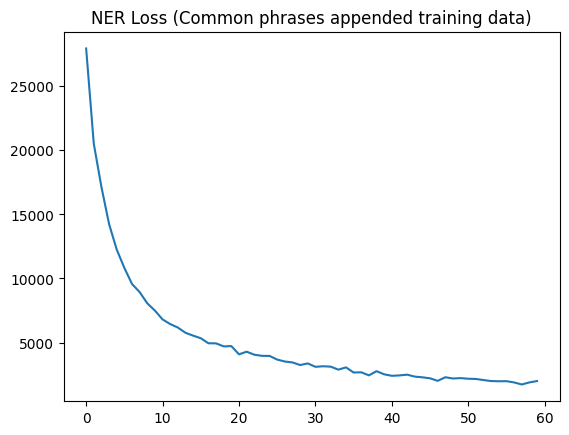

In [ ]:
plt.plot(cp_rates)
plt.title('NER Loss (Common phrases appended training data)')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/common phrases model loss.jpg')
plt.show()

In [ ]:
cp_output_dir = Path('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/cp_models')

if cp_output_dir is not None:
  cp_output_dir = Path(cp_output_dir)
  if not cp_output_dir.exists():
    cp_output_dir.mkdir()

  cp_nlp.meta['name'] = cp_model_name    #renaming model
  cp_nlp.to_disk(cp_output_dir)
  print('Model is saved to: ', cp_output_dir)

Model is saved to:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/cp_models


In [ ]:
#loading saved model and testing it on TEST DATA
print('Loading model from: ', cp_output_dir)
cp_nlp_2 = spacy.load(cp_output_dir)

cp_scorer = Scorer()

for input_, annotation in tqdm(TEST_DATA):
  doc_gold_text = cp_nlp_2.make_doc(input_)
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
  pred_val = cp_nlp_2(input_)
  cp_scorer.score(pred_val, gold_example)

Loading model from:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/cp_models


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-117-4359a79bebbc>:9: UserWarning:

[W030] Some entities could not be aligned in the text "OBJECTIVE: Congenital long QT syndrome (LQTS) with..." with entities "[(22, 38, 'DISEASEORPHENOTYPICFEATURE'), (40, 44, ...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

<ipython-input-117-4359a79bebbc>:9: UserWarning:

[W030] Some entities could not be aligned in the text "As a primary target for opioid drugs and peptides,..." with entities "[(55, 73, 'GENEORGENEPRODUCT'), (75, 80, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

  5%|▌         | 5/100 [00:00<00:02, 44.96it/s]<ipython-input-117-4359a79bebbc>:9: UserWarning:

[W030] Some entities could not be aligned in the text "Autism 

In [ ]:
cp_scorer.scores

{'uas': 0.0,
 'las': 0.0,
 'las_per_type': {'': {'p': 0.0, 'r': 0.0, 'f': 0.0}},
 'ents_p': 78.55579868708972,
 'ents_r': 71.08910891089108,
 'ents_f': 74.63617463617463,
 'ents_per_type': {'ORGANISMTAXON': {'p': 98.6784140969163,
   'r': 96.13733905579399,
   'f': 97.3913043478261},
  'GENEORGENEPRODUCT': {'p': 76.77304964539007,
   'r': 71.68874172185431,
   'f': 74.14383561643837},
  'DISEASEORPHENOTYPICFEATURE': {'p': 73.02231237322515,
   'r': 61.016949152542374,
   'f': 66.4819944598338},
  'SEQUENCEVARIANT': {'p': 72.31638418079096,
   'r': 71.50837988826815,
   'f': 71.91011235955057},
  'CHEMICALENTITY': {'p': 79.10863509749304,
   'r': 70.82294264339151,
   'f': 74.73684210526316},
  'CELLLINE': {'p': 87.5, 'r': 53.84615384615385, 'f': 66.66666666666667}},
 'tags_acc': 0.0,
 'token_acc': 100.0,
 'textcat_score': 0.0,
 'textcats_per_cat': {}}

In [ ]:
cp_scores = extract_scores(cp_scorer.scores)
cp_scores

{'Metric': ['Precision Score', 'Recall Score', 'F1 Score'],
 'OVERALL': [78.5558, 71.0891, 74.6362],
 'ORGANISMTAXON': [98.6784, 96.1373, 97.3913],
 'GENEORGENEPRODUCT': [76.773, 71.6887, 74.1438],
 'DISEASEORPHENOTYPICFEATURE': [73.0223, 61.0169, 66.482],
 'SEQUENCEVARIANT': [72.3164, 71.5084, 71.9101],
 'CHEMICALENTITY': [79.1086, 70.8229, 74.7368],
 'CELLLINE': [87.5, 53.8462, 66.6667]}

In [ ]:
pd.DataFrame(cp_scores).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/cpdata.csv')

In [ ]:
cp_performance = px.line(pd.DataFrame(cp_scores), x = 'Metric',
                         y = list(cp_scores.keys())[1:], markers = True,
                         labels = line_labels, color_discrete_map = line_colors,
                         title = 'Performance under common phrases appended training data')

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/common phrases performance.jpg')
cp_performance.show()

<Figure size 640x480 with 0 Axes>

### Experimenting with a smaller training dataset, ie only the original train set without dev set

In [ ]:
SM_TRAIN_DATA = train_ner

sm_model = None
sm_model_name = 'SMBioNER'

random.seed(0)

if sm_model is not None:
  sm_nlp = spacy.load(sm_model)    #load existing model
  print("Loading model '%s'" %sm_model)

else:
  sm_nlp = spacy.blank('en')    #create blank language model class
  print("created blank English model")

#add ner to pipeline

if 'ner' not in sm_nlp.pipe_names:
  sm_ner = sm_nlp.create_pipe('ner')
  sm_nlp.add_pipe(sm_ner)

else:
  sm_ner = sm_nlp.get_pipe('ner')

#add labels to the ner module

sm_ner.add_label(labels[0])
sm_ner.add_label(labels[1])
sm_ner.add_label(labels[2])
sm_ner.add_label(labels[3])
sm_ner.add_label(labels[4])
sm_ner.add_label(labels[5])

created blank English model


In [ ]:
!pip install spacy-lookups-data

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
#define optimizer

if sm_model is None:
  sm_optimizer = sm_nlp.begin_training()
else:
  sm_optimizer = sm_nlp.resume_training()


sm_move_names = list(sm_ner.move_names)

#pipe names to not affect

sm_pipe_exceptions = ['ner', 'trf_wordpiecer', 'trf_tok2vec']
sm_other_pipes = [pipe for pipe in sm_nlp.pipe_names if pipe not in sm_pipe_exceptions]

/usr/local/lib/python3.10/dist-packages/spacy/language.py:635: UserWarning:

[W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.



In [ ]:
#training the ner module

sm_rates = []

with sm_nlp.disable_pipes(*sm_other_pipes), warnings.catch_warnings():

  warnings.filterwarnings('once', category=UserWarning, module='spacy')   #show a misaglignment warning once only

  sizes = compounding(2.0, 125.0, 1.001)     #start, stop, compounding factor

  for itn in tqdm(range(n_iter)):

    random.shuffle(SM_TRAIN_DATA)
    batches = minibatch(SM_TRAIN_DATA, sizes)
    losses = {}

    for batch in batches:
      texts, annotations = zip(*batch)
      sm_nlp.update(texts, annotations, sgd = sm_optimizer, drop = 0.35, losses=losses)

    sm_rates.append([losses['ner']])

    print('Losses :', losses)

  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Podocytes play a key role in diabetic nephropathy ..." with entities "[(29, 49, 'DISEASEORPHENOTYPICFEATURE'), (118, 123...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "OBJECTIVES: SLCO1B1*5 and SLCO1B1*15 have been rep..." with entities "[(12, 19, 'GENEORGENEPRODUCT'), (26, 33, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could no

Losses : {'ner': 27294.43293899274}


  3%|▎         | 2/60 [00:42<20:22, 21.08s/it]

Losses : {'ner': 18630.499316045003}


  5%|▌         | 3/60 [01:02<19:32, 20.58s/it]

Losses : {'ner': 15719.92458435892}


  7%|▋         | 4/60 [01:19<17:49, 19.10s/it]

Losses : {'ner': 13953.152556071931}


  8%|▊         | 5/60 [01:36<16:41, 18.20s/it]

Losses : {'ner': 11750.12495226245}


 10%|█         | 6/60 [01:51<15:22, 17.08s/it]

Losses : {'ner': 10714.994177721912}


 12%|█▏        | 7/60 [02:06<14:34, 16.49s/it]

Losses : {'ner': 9892.807325581904}


 13%|█▎        | 8/60 [02:20<13:47, 15.91s/it]

Losses : {'ner': 9268.208916736117}


 15%|█▌        | 9/60 [02:35<13:15, 15.60s/it]

Losses : {'ner': 8900.119545189482}


 17%|█▋        | 10/60 [02:49<12:36, 15.14s/it]

Losses : {'ner': 7956.95773858794}


 18%|█▊        | 11/60 [03:04<12:10, 14.91s/it]

Losses : {'ner': 8184.615170934181}


 20%|██        | 12/60 [03:18<11:48, 14.76s/it]

Losses : {'ner': 6746.493409777896}


 22%|██▏       | 13/60 [03:33<11:28, 14.64s/it]

Losses : {'ner': 6983.058949425416}


 23%|██▎       | 14/60 [03:47<11:02, 14.40s/it]

Losses : {'ner': 6646.875110726782}


 25%|██▌       | 15/60 [04:00<10:38, 14.18s/it]

Losses : {'ner': 6721.0414010719505}


 27%|██▋       | 16/60 [04:14<10:23, 14.16s/it]

Losses : {'ner': 6288.543267404522}


 28%|██▊       | 17/60 [04:28<10:08, 14.16s/it]

Losses : {'ner': 5901.907955643248}


 30%|███       | 18/60 [04:42<09:49, 14.03s/it]

Losses : {'ner': 5706.075792032894}


 32%|███▏      | 19/60 [04:56<09:29, 13.90s/it]

Losses : {'ner': 5760.29824105461}


 33%|███▎      | 20/60 [05:09<09:06, 13.67s/it]

Losses : {'ner': 5644.3628608315}


 35%|███▌      | 21/60 [05:22<08:50, 13.60s/it]

Losses : {'ner': 5433.4302111618745}


 37%|███▋      | 22/60 [05:36<08:34, 13.53s/it]

Losses : {'ner': 5089.579882055281}


 38%|███▊      | 23/60 [05:48<08:11, 13.28s/it]

Losses : {'ner': 4814.22554505452}


 40%|████      | 24/60 [06:02<07:56, 13.24s/it]

Losses : {'ner': 4694.024431035112}


 42%|████▏     | 25/60 [06:14<07:40, 13.14s/it]

Losses : {'ner': 4614.503120552807}


 43%|████▎     | 26/60 [06:27<07:22, 13.02s/it]

Losses : {'ner': 4775.4989737110445}


 45%|████▌     | 27/60 [06:40<07:11, 13.06s/it]

Losses : {'ner': 4501.740569494601}


 47%|████▋     | 28/60 [06:54<07:02, 13.19s/it]

Losses : {'ner': 4758.262878440568}


 48%|████▊     | 29/60 [07:07<06:45, 13.08s/it]

Losses : {'ner': 4328.027417197445}


 50%|█████     | 30/60 [07:19<06:25, 12.85s/it]

Losses : {'ner': 4058.8850293789874}


 52%|█████▏    | 31/60 [07:32<06:12, 12.84s/it]

Losses : {'ner': 4215.4357186441775}


 53%|█████▎    | 32/60 [07:45<05:59, 12.84s/it]

Losses : {'ner': 4503.549813036167}


 55%|█████▌    | 33/60 [07:57<05:46, 12.83s/it]

Losses : {'ner': 4258.215049914777}


 57%|█████▋    | 34/60 [08:10<05:31, 12.75s/it]

Losses : {'ner': 4114.366269269725}


 58%|█████▊    | 35/60 [08:24<05:26, 13.06s/it]

Losses : {'ner': 3556.1468439013697}


 60%|██████    | 36/60 [08:38<05:18, 13.26s/it]

Losses : {'ner': 3589.0503461431363}


 62%|██████▏   | 37/60 [08:51<05:06, 13.33s/it]

Losses : {'ner': 3725.915668847659}


 63%|██████▎   | 38/60 [09:04<04:52, 13.28s/it]

Losses : {'ner': 4809.633445259911}


 65%|██████▌   | 39/60 [09:18<04:40, 13.34s/it]

Losses : {'ner': 4950.6179374481535}


 67%|██████▋   | 40/60 [09:31<04:28, 13.44s/it]

Losses : {'ner': 4631.034651198774}


 68%|██████▊   | 41/60 [09:50<04:45, 15.03s/it]

Losses : {'ner': 4061.8326862894464}


 70%|███████   | 42/60 [10:06<04:36, 15.35s/it]

Losses : {'ner': 4369.699871427845}


 72%|███████▏  | 43/60 [10:19<04:09, 14.70s/it]

Losses : {'ner': 4035.265014775534}


 73%|███████▎  | 44/60 [10:33<03:47, 14.25s/it]

Losses : {'ner': 4737.196126428433}


 75%|███████▌  | 45/60 [10:45<03:26, 13.77s/it]

Losses : {'ner': 3706.5485549918376}


 77%|███████▋  | 46/60 [10:58<03:09, 13.57s/it]

Losses : {'ner': 3431.7372107022675}


 78%|███████▊  | 47/60 [11:11<02:54, 13.43s/it]

Losses : {'ner': 4171.288571441861}


 80%|████████  | 48/60 [11:25<02:41, 13.44s/it]

Losses : {'ner': 3378.6093770902517}


 82%|████████▏ | 49/60 [11:38<02:26, 13.35s/it]

Losses : {'ner': 3205.1665889279684}


 83%|████████▎ | 50/60 [11:51<02:11, 13.15s/it]

Losses : {'ner': 3595.097755633353}


 85%|████████▌ | 51/60 [12:04<01:58, 13.11s/it]

Losses : {'ner': 3309.439477994565}


 87%|████████▋ | 52/60 [12:17<01:45, 13.22s/it]

Losses : {'ner': 4022.215768138878}


 88%|████████▊ | 53/60 [12:30<01:32, 13.15s/it]

Losses : {'ner': 3398.844391852239}


 90%|█████████ | 54/60 [12:43<01:18, 13.06s/it]

Losses : {'ner': 3252.7715503722297}


 92%|█████████▏| 55/60 [12:55<01:04, 12.87s/it]

Losses : {'ner': 2966.8726575374603}


 93%|█████████▎| 56/60 [13:08<00:51, 12.91s/it]

Losses : {'ner': 3217.788098613266}


 95%|█████████▌| 57/60 [13:22<00:38, 12.96s/it]

Losses : {'ner': 3631.911107974127}


 97%|█████████▋| 58/60 [13:35<00:26, 13.15s/it]

Losses : {'ner': 3056.9268025972506}


 98%|█████████▊| 59/60 [13:48<00:13, 13.20s/it]

Losses : {'ner': 3426.387455107644}


100%|██████████| 60/60 [14:02<00:00, 14.03s/it]

Losses : {'ner': 3205.0589607931324}


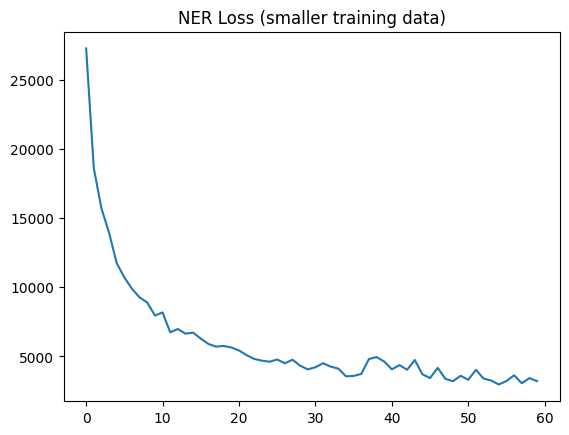

In [ ]:
plt.plot(sm_rates)
plt.title('NER Loss (smaller training data)')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/smaller train data model loss.jpg')
plt.show()

In [ ]:
sm_output_dir = Path('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/sm_models')

if sm_output_dir is not None:
  sm_output_dir = Path(sm_output_dir)
  if not sm_output_dir.exists():
    sm_output_dir.mkdir()

  sm_nlp.meta['name'] = sm_model_name    #renaming model
  sm_nlp.to_disk(sm_output_dir)
  print('Model is saved to: ', sm_output_dir)

Model is saved to:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/sm_models


In [ ]:
#loading saved model and testing it on TEST DATA
print('Loading model from: ', sm_output_dir)
sm_nlp_2 = spacy.load(sm_output_dir)

sm_scorer = Scorer()

for input_, annotation in tqdm(TEST_DATA):
  doc_gold_text = sm_nlp_2.make_doc(input_)
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
  pred_val = sm_nlp_2(input_)
  sm_scorer.score(pred_val, gold_example)

Loading model from:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/sm_models


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-113-16135597a07a>:9: UserWarning:

[W030] Some entities could not be aligned in the text "OBJECTIVE: Congenital long QT syndrome (LQTS) with..." with entities "[(22, 38, 'DISEASEORPHENOTYPICFEATURE'), (40, 44, ...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

<ipython-input-113-16135597a07a>:9: UserWarning:

[W030] Some entities could not be aligned in the text "As a primary target for opioid drugs and peptides,..." with entities "[(55, 73, 'GENEORGENEPRODUCT'), (75, 80, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

  3%|▎         | 3/100 [00:00<00:04, 21.98it/s]<ipython-input-113-16135597a07a>:9: UserWarning:

[W030] Some entities could not be aligned in the text "Autism 

In [ ]:
sm_scores = extract_scores(sm_scorer.scores)
sm_scores

{'Metric': ['Precision Score', 'Recall Score', 'F1 Score'],
 'OVERALL': [75.6842, 71.1881, 73.3673],
 'ORGANISMTAXON': [98.6726, 95.7082, 97.1678],
 'GENEORGENEPRODUCT': [74.1348, 67.3841, 70.5984],
 'DISEASEORPHENOTYPICFEATURE': [71.0821, 64.5763, 67.6732],
 'SEQUENCEVARIANT': [66.8317, 75.419, 70.8661],
 'CHEMICALENTITY': [75.5968, 71.0723, 73.2648],
 'CELLLINE': [70.0, 53.8462, 60.8696]}

In [ ]:
pd.DataFrame(sm_scores).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/smalltrain.csv')

In [ ]:
sm_performance = px.line(pd.DataFrame(sm_scores), x = 'Metric',
                         y = list(sm_scores.keys())[1:], markers = True,
                         labels = line_labels, color_discrete_map = line_colors,
                         title = 'Performance under smaller training data')

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/smaller train data performance.jpg')
sm_performance.show()

<Figure size 640x480 with 0 Axes>

### Dropout -> 20% (lower) with Common phrases data

In [ ]:
ldp_model = None
ldp_model_name = 'LDPBioNER'

random.seed(0)

if ldp_model is not None:
  ldp_nlp = spacy.load(ldp_model)    #load existing model
  print("Loading model '%s'" %ldp_model)

else:
  ldp_nlp = spacy.blank('en')    #create blank language model class
  print("created blank English model")

#add ner to pipeline

if 'ner' not in ldp_nlp.pipe_names:
  ldp_ner = ldp_nlp.create_pipe('ner')
  ldp_nlp.add_pipe(ldp_ner)

else:
  ldp_ner = ldp_nlp.get_pipe('ner')

#add labels to the ner module

ldp_ner.add_label(labels[0])
ldp_ner.add_label(labels[1])
ldp_ner.add_label(labels[2])
ldp_ner.add_label(labels[3])
ldp_ner.add_label(labels[4])
ldp_ner.add_label(labels[5])

created blank English model


In [ ]:
!pip install spacy-lookups-data

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
#define optimizer

if ldp_model is None:
  ldp_optimizer = ldp_nlp.begin_training()
else:
  ldp_optimizer = ldp_nlp.resume_training()


ldp_move_names = list(ldp_ner.move_names)

#pipe names to not affect

ldp_pipe_exceptions = ['ner', 'trf_wordpiecer', 'trf_tok2vec']
ldp_other_pipes = [pipe for pipe in ldp_nlp.pipe_names if pipe not in ldp_pipe_exceptions]

/usr/local/lib/python3.10/dist-packages/spacy/language.py:635: UserWarning:

[W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.



In [ ]:
#training the ner module

ldp_rates = []

with ldp_nlp.disable_pipes(*ldp_other_pipes), warnings.catch_warnings():

  warnings.filterwarnings('once', category=UserWarning, module='spacy')   #show a misaglignment warning once only

  sizes = compounding(2.0, 125.0, 1.001)     #start, stop, compounding factor

  for itn in tqdm(range(n_iter)):

    random.shuffle(CP_TRAIN_DATA)
    batches = minibatch(CP_TRAIN_DATA, sizes)
    losses = {}

    for batch in batches:
      texts, annotations = zip(*batch)
      ldp_nlp.update(texts, annotations, sgd = ldp_optimizer, drop = 0.20, losses=losses)

    ldp_rates.append([losses['ner']])

    print('Losses :', losses)

  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Otilonium bromide (OB) is a spasmolytic drug succe..." with entities "[(0, 17, 'CHEMICALENTITY'), (19, 21, 'CHEMICALENTI...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "A new genetic disorder has been identified that re..." with entities "[(73, 77, 'GENEORGENEPRODUCT'), (88, 115, 'GENEORG...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could no

Losses : {'ner': 27658.478451479226}


  3%|▎         | 2/60 [01:25<38:14, 39.56s/it]  

Losses : {'ner': 17345.93493046524}


  5%|▌         | 3/60 [01:46<29:39, 31.23s/it]

Losses : {'ner': 12632.524094805449}


  7%|▋         | 4/60 [02:04<23:58, 25.69s/it]

Losses : {'ner': 10221.444937128115}


  8%|▊         | 5/60 [02:24<21:37, 23.60s/it]

Losses : {'ner': 8023.690403855688}


 10%|█         | 6/60 [02:43<19:56, 22.15s/it]

Losses : {'ner': 6853.330290033651}


 12%|█▏        | 7/60 [02:59<17:56, 20.32s/it]

Losses : {'ner': 5880.548775130184}


 13%|█▎        | 8/60 [03:24<18:49, 21.73s/it]

Losses : {'ner': 5076.039165012538}


 15%|█▌        | 9/60 [03:42<17:23, 20.46s/it]

Losses : {'ner': 4568.407950103283}


 17%|█▋        | 10/60 [03:56<15:33, 18.67s/it]

Losses : {'ner': 3981.3143071234226}


 18%|█▊        | 11/60 [04:12<14:32, 17.81s/it]

Losses : {'ner': 3356.6936926543713}


 20%|██        | 12/60 [04:35<15:32, 19.42s/it]

Losses : {'ner': 3162.2956698237094}


 22%|██▏       | 13/60 [04:50<14:04, 17.97s/it]

Losses : {'ner': 2915.2244576108646}


 23%|██▎       | 14/60 [05:08<13:51, 18.07s/it]

Losses : {'ner': 2607.2040700912476}


 25%|██▌       | 15/60 [05:24<12:58, 17.31s/it]

Losses : {'ner': 2315.4861360829054}


 27%|██▋       | 16/60 [05:42<12:53, 17.57s/it]

Losses : {'ner': 2201.434318602085}


 28%|██▊       | 17/60 [06:02<13:03, 18.22s/it]

Losses : {'ner': 2242.1622734069824}


 30%|███       | 18/60 [06:21<12:57, 18.50s/it]

Losses : {'ner': 2003.2248594633818}


 32%|███▏      | 19/60 [06:50<14:45, 21.61s/it]

Losses : {'ner': 1726.222106873989}


 33%|███▎      | 20/60 [07:09<13:54, 20.87s/it]

Losses : {'ner': 1650.739995835349}


 35%|███▌      | 21/60 [07:32<14:00, 21.56s/it]

Losses : {'ner': 1643.8739219023846}


 37%|███▋      | 22/60 [07:52<13:13, 20.89s/it]

Losses : {'ner': 1577.070591211319}


 38%|███▊      | 23/60 [08:12<12:53, 20.92s/it]

Losses : {'ner': 1440.3300638198853}


 40%|████      | 24/60 [08:29<11:48, 19.69s/it]

Losses : {'ner': 1298.35964936018}


 42%|████▏     | 25/60 [08:54<12:25, 21.30s/it]

Losses : {'ner': 1241.207849919796}


 43%|████▎     | 26/60 [09:14<11:48, 20.84s/it]

Losses : {'ner': 1181.0737976133823}


 45%|████▌     | 27/60 [09:36<11:38, 21.15s/it]

Losses : {'ner': 1187.8251630663872}


 47%|████▋     | 28/60 [09:52<10:30, 19.70s/it]

Losses : {'ner': 1068.179550703615}


 48%|████▊     | 29/60 [10:07<09:27, 18.30s/it]

Losses : {'ner': 964.0489260554314}


 50%|█████     | 30/60 [10:22<08:39, 17.33s/it]

Losses : {'ner': 1007.306418903172}


 52%|█████▏    | 31/60 [10:39<08:18, 17.17s/it]

Losses : {'ner': 884.5776877491153}


 53%|█████▎    | 32/60 [10:55<07:51, 16.84s/it]

Losses : {'ner': 904.4149430543184}


 55%|█████▌    | 33/60 [11:10<07:17, 16.22s/it]

Losses : {'ner': 883.7552256584167}


 57%|█████▋    | 34/60 [11:26<06:55, 15.99s/it]

Losses : {'ner': 829.2519269287586}


 58%|█████▊    | 35/60 [11:41<06:36, 15.85s/it]

Losses : {'ner': 736.4992678165436}


 60%|██████    | 36/60 [11:59<06:35, 16.47s/it]

Losses : {'ner': 775.4814641773701}


 62%|██████▏   | 37/60 [12:26<07:31, 19.61s/it]

Losses : {'ner': 731.6513975858688}


 63%|██████▎   | 38/60 [12:52<07:52, 21.49s/it]

Losses : {'ner': 720.5901130939754}


 65%|██████▌   | 39/60 [13:07<06:54, 19.73s/it]

Losses : {'ner': 721.3614382445812}


 67%|██████▋   | 40/60 [13:23<06:08, 18.42s/it]

Losses : {'ner': 705.5896775126457}


 68%|██████▊   | 41/60 [13:45<06:10, 19.52s/it]

Losses : {'ner': 618.2829371392727}


 70%|███████   | 42/60 [14:03<05:44, 19.14s/it]

Losses : {'ner': 678.5926471948624}


 72%|███████▏  | 43/60 [14:29<06:01, 21.27s/it]

Losses : {'ner': 639.4650793075562}


 73%|███████▎  | 44/60 [14:54<05:55, 22.24s/it]

Losses : {'ner': 603.0601930916309}


 75%|███████▌  | 45/60 [15:13<05:20, 21.37s/it]

Losses : {'ner': 609.4038335084915}


 77%|███████▋  | 46/60 [15:32<04:50, 20.74s/it]

Losses : {'ner': 589.0646317452192}


 78%|███████▊  | 47/60 [15:52<04:25, 20.44s/it]

Losses : {'ner': 540.9562144577503}


 80%|████████  | 48/60 [16:08<03:47, 18.99s/it]

Losses : {'ner': 521.8577136999738}


 82%|████████▏ | 49/60 [16:23<03:17, 17.94s/it]

Losses : {'ner': 484.6659798324108}


 83%|████████▎ | 50/60 [16:39<02:54, 17.42s/it]

Losses : {'ner': 533.823686893098}


 85%|████████▌ | 51/60 [16:55<02:31, 16.79s/it]

Losses : {'ner': 517.5059570670128}


 87%|████████▋ | 52/60 [17:10<02:11, 16.42s/it]

Losses : {'ner': 411.45742908120155}


 88%|████████▊ | 53/60 [17:27<01:54, 16.35s/it]

Losses : {'ner': 453.43124708533287}


 90%|█████████ | 54/60 [17:41<01:35, 15.88s/it]

Losses : {'ner': 484.7883480787277}


 92%|█████████▏| 55/60 [17:56<01:17, 15.53s/it]

Losses : {'ner': 392.5649071484804}


 93%|█████████▎| 56/60 [18:12<01:02, 15.52s/it]

Losses : {'ner': 492.70909148454666}


 95%|█████████▌| 57/60 [18:27<00:46, 15.46s/it]

Losses : {'ner': 453.4326227070526}


 97%|█████████▋| 58/60 [18:43<00:31, 15.54s/it]

Losses : {'ner': 474.0171409845352}


 98%|█████████▊| 59/60 [18:58<00:15, 15.61s/it]

Losses : {'ner': 450.3782249689102}


100%|██████████| 60/60 [19:14<00:00, 19.24s/it]

Losses : {'ner': 385.23021897510625}


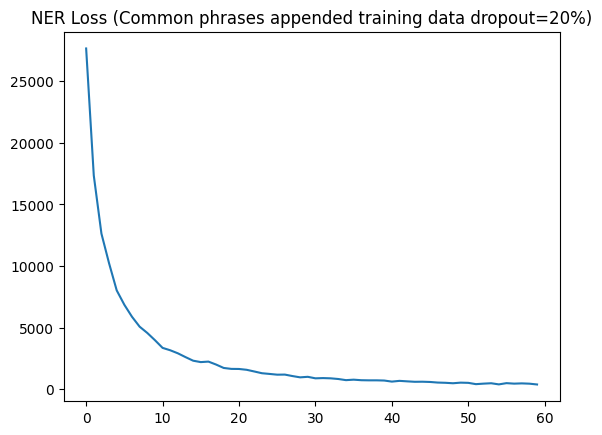

In [ ]:
plt.plot(ldp_rates)
plt.title('NER Loss (Common phrases appended training data dropout=20%)')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/lower dropout common phrases model loss.jpg')
plt.show()

In [ ]:
ldp_output_dir = Path('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/ldp_models')

if ldp_output_dir is not None:
  ldp_output_dir = Path(ldp_output_dir)
  if not ldp_output_dir.exists():
    ldp_output_dir.mkdir()

  ldp_nlp.meta['name'] = ldp_model_name    #renaming model
  ldp_nlp.to_disk(ldp_output_dir)
  print('Model is saved to: ', ldp_output_dir)

Model is saved to:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/ldp_models


In [ ]:
#loading saved model and testing it on TEST DATA
print('Loading model from: ', ldp_output_dir)
ldp_nlp_2 = spacy.load(ldp_output_dir)

ldp_scorer = Scorer()

for input_, annotation in tqdm(TEST_DATA):
  doc_gold_text = ldp_nlp_2.make_doc(input_)
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
  pred_val = ldp_nlp_2(input_)
  ldp_scorer.score(pred_val, gold_example)

Loading model from:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/ldp_models


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-155-640e714a971f>:9: UserWarning:

[W030] Some entities could not be aligned in the text "OBJECTIVE: Congenital long QT syndrome (LQTS) with..." with entities "[(22, 38, 'DISEASEORPHENOTYPICFEATURE'), (40, 44, ...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

<ipython-input-155-640e714a971f>:9: UserWarning:

[W030] Some entities could not be aligned in the text "As a primary target for opioid drugs and peptides,..." with entities "[(55, 73, 'GENEORGENEPRODUCT'), (75, 80, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

  5%|▌         | 5/100 [00:00<00:02, 41.91it/s]<ipython-input-155-640e714a971f>:9: UserWarning:

[W030] Some entities could not be aligned in the text "Autism 

In [ ]:
ldp_scores = extract_scores(ldp_scorer.scores)
ldp_scores

{'Metric': ['Precision Score', 'Recall Score', 'F1 Score'],
 'OVERALL': [80.1767, 71.8812, 75.8027],
 'ORGANISMTAXON': [98.2533, 96.5665, 97.4026],
 'GENEORGENEPRODUCT': [79.0441, 71.1921, 74.9129],
 'DISEASEORPHENOTYPICFEATURE': [76.5784, 63.7288, 69.5652],
 'SEQUENCEVARIANT': [73.2955, 72.067, 72.6761],
 'CHEMICALENTITY': [79.0055, 71.3217, 74.9672],
 'CELLLINE': [66.6667, 46.1538, 54.5455]}

In [ ]:
pd.DataFrame(ldp_scores).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/lowdropout.csv')

In [ ]:
ldp_performance = px.line(pd.DataFrame(ldp_scores), x = 'Metric',
                         y = list(ldp_scores.keys())[1:], markers = True,
                         labels = line_labels, color_discrete_map = line_colors,
                          title = 'Performance under common phrases appended training data (dropout=20%)')

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/common phrases performance (low dropout).jpg')
ldp_performance.show()

<Figure size 640x480 with 0 Axes>

### Dropout -> 50% (high) with Common phrases data

In [ ]:
hdp_model = None
hdp_model_name = 'HDPBioNER'

random.seed(0)

if hdp_model is not None:
  hdp_nlp = spacy.load(hdp_model)    #load existing model
  print("Loading model '%s'" %hdp_model)

else:
  hdp_nlp = spacy.blank('en')    #create blank language model class
  print("created blank English model")

#add ner to pipeline

if 'ner' not in hdp_nlp.pipe_names:
  hdp_ner = hdp_nlp.create_pipe('ner')
  hdp_nlp.add_pipe(hdp_ner)

else:
  hdp_ner = hdp_nlp.get_pipe('ner')

#add labels to the ner module

hdp_ner.add_label(labels[0])
hdp_ner.add_label(labels[1])
hdp_ner.add_label(labels[2])
hdp_ner.add_label(labels[3])
hdp_ner.add_label(labels[4])
hdp_ner.add_label(labels[5])

created blank English model


In [ ]:
#define optimizer

if hdp_model is None:
  hdp_optimizer = hdp_nlp.begin_training()
else:
  hdp_optimizer = hdp_nlp.resume_training()


hdp_move_names = list(hdp_ner.move_names)

#pipe names to not affect

hdp_pipe_exceptions = ['ner', 'trf_wordpiecer', 'trf_tok2vec']
hdp_other_pipes = [pipe for pipe in hdp_nlp.pipe_names if pipe not in hdp_pipe_exceptions]

/usr/local/lib/python3.10/dist-packages/spacy/language.py:635: UserWarning:

[W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.



In [ ]:
!pip install spacy-lookups-data

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
#training the ner module

hdp_rates = []

with hdp_nlp.disable_pipes(*hdp_other_pipes), warnings.catch_warnings():

  warnings.filterwarnings('once', category=UserWarning, module='spacy')   #show a misaglignment warning once only

  sizes = compounding(2.0, 125.0, 1.001)     #start, stop, compounding factor

  for itn in tqdm(range(n_iter)):

    random.shuffle(CP_TRAIN_DATA)
    batches = minibatch(CP_TRAIN_DATA, sizes)
    losses = {}

    for batch in batches:
      texts, annotations = zip(*batch)
      hdp_nlp.update(texts, annotations, sgd = hdp_optimizer, drop = 0.50, losses=losses)

    hdp_rates.append([losses['ner']])

    print('Losses :', losses)

  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "This was an exploratory study to investigate lamiv..." with entities "[(45, 55, 'CHEMICALENTITY'), (66, 83, 'ORGANISMTAX...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Contrast-induced nephropathy (CIN) is an iatrogeni..." with entities "[(0, 28, 'DISEASEORPHENOTYPICFEATURE'), (30, 33, '...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could no

Losses : {'ner': 30478.856954225994}


  3%|▎         | 2/60 [01:10<32:50, 33.98s/it]

Losses : {'ner': 23438.222738083306}


  5%|▌         | 3/60 [01:35<28:20, 29.84s/it]

Losses : {'ner': 21188.37632333026}


  7%|▋         | 4/60 [01:55<24:13, 25.95s/it]

Losses : {'ner': 19869.811390833307}


  8%|▊         | 5/60 [02:15<21:54, 23.90s/it]

Losses : {'ner': 17704.029676890208}


 10%|█         | 6/60 [02:56<26:48, 29.78s/it]

Losses : {'ner': 16415.97372073944}


 12%|█▏        | 7/60 [03:28<26:59, 30.56s/it]

Losses : {'ner': 14962.36122149229}


 13%|█▎        | 8/60 [03:55<25:29, 29.41s/it]

Losses : {'ner': 13828.138133525848}


 15%|█▌        | 9/60 [04:14<22:08, 26.05s/it]

Losses : {'ner': 13287.188652396202}


 17%|█▋        | 10/60 [04:31<19:22, 23.24s/it]

Losses : {'ner': 12310.88221359253}


 18%|█▊        | 11/60 [05:00<20:20, 24.90s/it]

Losses : {'ner': 11659.264275074005}


 20%|██        | 12/60 [05:33<22:05, 27.61s/it]

Losses : {'ner': 11086.94337844979}


 22%|██▏       | 13/60 [05:54<19:56, 25.46s/it]

Losses : {'ner': 10696.84976363182}


 23%|██▎       | 14/60 [06:14<18:15, 23.81s/it]

Losses : {'ner': 10354.877489089966}


 25%|██▌       | 15/60 [06:33<16:47, 22.39s/it]

Losses : {'ner': 10067.796897347633}


 27%|██▋       | 16/60 [06:57<16:41, 22.76s/it]

Losses : {'ner': 9318.003242492676}


 28%|██▊       | 17/60 [07:27<17:53, 24.96s/it]

Losses : {'ner': 9061.257668495178}


 30%|███       | 18/60 [07:55<18:13, 26.04s/it]

Losses : {'ner': 9077.176420524716}


 32%|███▏      | 19/60 [08:18<17:04, 25.00s/it]

Losses : {'ner': 8672.504587173462}


 33%|███▎      | 20/60 [08:39<15:51, 23.78s/it]

Losses : {'ner': 8433.839708328247}


 35%|███▌      | 21/60 [09:10<16:49, 25.90s/it]

Losses : {'ner': 8262.857232093811}


 37%|███▋      | 22/60 [09:26<14:36, 23.07s/it]

Losses : {'ner': 8131.660089492798}


 38%|███▊      | 23/60 [09:53<15:02, 24.39s/it]

Losses : {'ner': 7992.47767829895}


 40%|████      | 24/60 [10:23<15:35, 25.97s/it]

Losses : {'ner': 7500.311641693115}


 42%|████▏     | 25/60 [10:49<15:07, 25.92s/it]

Losses : {'ner': 7431.539197921753}


 43%|████▎     | 26/60 [11:14<14:34, 25.72s/it]

Losses : {'ner': 7213.37636756897}


 45%|████▌     | 27/60 [11:41<14:14, 25.91s/it]

Losses : {'ner': 7379.548281669617}


 47%|████▋     | 28/60 [12:07<13:50, 25.96s/it]

Losses : {'ner': 6932.243495941162}


 48%|████▊     | 29/60 [12:35<13:44, 26.60s/it]

Losses : {'ner': 7053.022327423096}


 50%|█████     | 30/60 [13:02<13:25, 26.85s/it]

Losses : {'ner': 6596.167161464691}


 52%|█████▏    | 31/60 [13:26<12:33, 26.00s/it]

Losses : {'ner': 6640.3714056015015}


 53%|█████▎    | 32/60 [13:46<11:20, 24.29s/it]

Losses : {'ner': 6667.171872138977}


 55%|█████▌    | 33/60 [14:02<09:42, 21.59s/it]

Losses : {'ner': 6542.519458770752}


 57%|█████▋    | 34/60 [14:17<08:33, 19.73s/it]

Losses : {'ner': 6376.707159042358}


 58%|█████▊    | 35/60 [14:33<07:42, 18.48s/it]

Losses : {'ner': 6455.186777114868}


 60%|██████    | 36/60 [14:51<07:25, 18.55s/it]

Losses : {'ner': 6420.241354465485}


 62%|██████▏   | 37/60 [15:12<07:17, 19.01s/it]

Losses : {'ner': 6031.863109588623}


 63%|██████▎   | 38/60 [15:30<06:53, 18.78s/it]

Losses : {'ner': 5998.132411381626}


 65%|██████▌   | 39/60 [15:44<06:08, 17.56s/it]

Losses : {'ner': 5941.619559288025}


 67%|██████▋   | 40/60 [16:00<05:40, 17.01s/it]

Losses : {'ner': 5597.564754486084}


 68%|██████▊   | 41/60 [16:16<05:15, 16.59s/it]

Losses : {'ner': 5874.559278011322}


 70%|███████   | 42/60 [16:31<04:49, 16.11s/it]

Losses : {'ner': 5769.713178634644}


 72%|███████▏  | 43/60 [16:47<04:33, 16.07s/it]

Losses : {'ner': 5535.445255279541}


 73%|███████▎  | 44/60 [17:03<04:17, 16.09s/it]

Losses : {'ner': 5614.814041137695}


 75%|███████▌  | 45/60 [17:19<04:00, 16.02s/it]

Losses : {'ner': 5329.061481714249}


 77%|███████▋  | 46/60 [17:35<03:44, 16.01s/it]

Losses : {'ner': 5392.399055480957}


 78%|███████▊  | 47/60 [17:50<03:24, 15.77s/it]

Losses : {'ner': 5125.345857620239}


 80%|████████  | 48/60 [18:06<03:11, 15.98s/it]

Losses : {'ner': 5277.67711520195}


 82%|████████▏ | 49/60 [18:21<02:52, 15.67s/it]

Losses : {'ner': 5151.4894371032715}


 83%|████████▎ | 50/60 [18:37<02:35, 15.51s/it]

Losses : {'ner': 5027.476590156555}


 85%|████████▌ | 51/60 [18:52<02:18, 15.37s/it]

Losses : {'ner': 4944.411079406738}


 87%|████████▋ | 52/60 [19:07<02:03, 15.38s/it]

Losses : {'ner': 4878.124773025513}


 88%|████████▊ | 53/60 [19:22<01:46, 15.18s/it]

Losses : {'ner': 5157.684302330017}


 90%|█████████ | 54/60 [19:37<01:31, 15.21s/it]

Losses : {'ner': 4797.681583404541}


 92%|█████████▏| 55/60 [19:53<01:17, 15.54s/it]

Losses : {'ner': 4751.452783584595}


 93%|█████████▎| 56/60 [20:09<01:02, 15.61s/it]

Losses : {'ner': 4675.420574188232}


 95%|█████████▌| 57/60 [20:24<00:46, 15.51s/it]

Losses : {'ner': 4894.857428014278}


 97%|█████████▋| 58/60 [20:41<00:31, 15.83s/it]

Losses : {'ner': 4742.325012207031}


 98%|█████████▊| 59/60 [20:57<00:16, 16.00s/it]

Losses : {'ner': 4973.659215927124}


100%|██████████| 60/60 [21:12<00:00, 21.22s/it]

Losses : {'ner': 4906.222589492798}


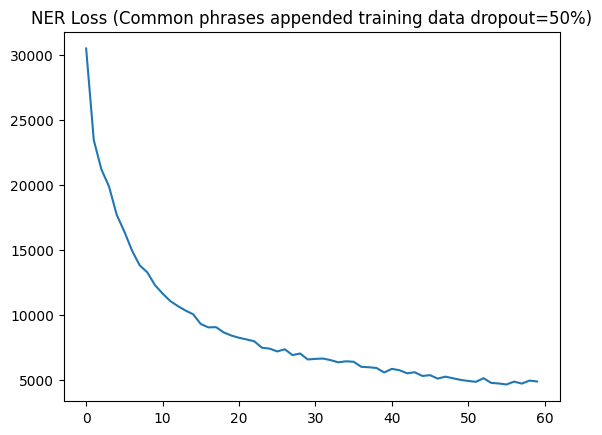

In [ ]:
plt.plot(hdp_rates)
plt.title('NER Loss (Common phrases appended training data dropout=50%)')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/higher dropout common phrases model loss.jpg')
plt.show()

In [ ]:
hdp_output_dir = Path('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/hdp_models')

if hdp_output_dir is not None:
  hdp_output_dir = Path(hdp_output_dir)
  if not hdp_output_dir.exists():
    hdp_output_dir.mkdir()

  hdp_nlp.meta['name'] = hdp_model_name    #renaming model
  hdp_nlp.to_disk(hdp_output_dir)
  print('Model is saved to: ', hdp_output_dir)

Model is saved to:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/hdp_models


In [ ]:
#loading saved model and testing it on TEST DATA
print('Loading model from: ', hdp_output_dir)
hdp_nlp_2 = spacy.load(hdp_output_dir)

hdp_scorer = Scorer()

for input_, annotation in tqdm(TEST_DATA):
  doc_gold_text = hdp_nlp_2.make_doc(input_)
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
  pred_val = hdp_nlp_2(input_)
  hdp_scorer.score(pred_val, gold_example)

Loading model from:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/hdp_models


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-167-8b58983ea883>:9: UserWarning:

[W030] Some entities could not be aligned in the text "OBJECTIVE: Congenital long QT syndrome (LQTS) with..." with entities "[(22, 38, 'DISEASEORPHENOTYPICFEATURE'), (40, 44, ...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

<ipython-input-167-8b58983ea883>:9: UserWarning:

[W030] Some entities could not be aligned in the text "As a primary target for opioid drugs and peptides,..." with entities "[(55, 73, 'GENEORGENEPRODUCT'), (75, 80, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

  4%|▍         | 4/100 [00:00<00:02, 38.54it/s]<ipython-input-167-8b58983ea883>:9: UserWarning:

[W030] Some entities could not be aligned in the text "Autism 

In [ ]:
hdp_scores = extract_scores(hdp_scorer.scores)
hdp_scores

{'Metric': ['Precision Score', 'Recall Score', 'F1 Score'],
 'OVERALL': [77.6661, 68.8614, 72.9992],
 'ORGANISMTAXON': [99.115, 96.1373, 97.6035],
 'GENEORGENEPRODUCT': [71.8802, 71.5232, 71.7012],
 'DISEASEORPHENOTYPICFEATURE': [71.8884, 56.7797, 63.447],
 'SEQUENCEVARIANT': [82.2368, 69.8324, 75.5287],
 'CHEMICALENTITY': [79.7059, 67.581, 73.1444],
 'CELLLINE': [66.6667, 30.7692, 42.1053]}

In [ ]:
pd.DataFrame(hdp_scores).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/highdropout.csv')

In [ ]:
hdp_performance = px.line(pd.DataFrame(hdp_scores), x = 'Metric',
                         y = list(hdp_scores.keys())[1:], markers = True,
                         labels = line_labels, color_discrete_map = line_colors,
                          title = 'Performance under common phrases appended training data (droput=50%)')

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/common phrases performance (high dropout).jpg')
hdp_performance.show()

<Figure size 640x480 with 0 Axes>

### higher compounding and narrower gap (start to finish)

In [ ]:
bt_model = None
bt_model_name = 'BTBioNER'

random.seed(0)

if bt_model is not None:
  bt_nlp = spacy.load(bt_model)    #load existing model
  print("Loading model '%s'" %bt_model)

else:
  bt_nlp = spacy.blank('en')    #create blank language model class
  print("created blank English model")

#add ner to pipeline

if 'ner' not in bt_nlp.pipe_names:
  bt_ner = bt_nlp.create_pipe('ner')
  bt_nlp.add_pipe(bt_ner)

else:
  bt_ner = bt_nlp.get_pipe('ner')

#add labels to the ner module

bt_ner.add_label(labels[0])
bt_ner.add_label(labels[1])
bt_ner.add_label(labels[2])
bt_ner.add_label(labels[3])
bt_ner.add_label(labels[4])
bt_ner.add_label(labels[5])

created blank English model


In [ ]:
#define optimizer

if bt_model is None:
  bt_optimizer = bt_nlp.begin_training()
else:
  bt_optimizer = bt_nlp.resume_training()


bt_move_names = list(bt_ner.move_names)

#pipe names to not affect

bt_pipe_exceptions = ['ner', 'trf_wordpiecer', 'trf_tok2vec']
bt_other_pipes = [pipe for pipe in bt_nlp.pipe_names if pipe not in bt_pipe_exceptions]

/usr/local/lib/python3.10/dist-packages/spacy/language.py:635: UserWarning:

[W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.



In [ ]:
!pip install spacy-lookups-data

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
#training the ner module

bt_rates = []

with bt_nlp.disable_pipes(*bt_other_pipes), warnings.catch_warnings():

  warnings.filterwarnings('once', category=UserWarning, module='spacy')   #show a misaglignment warning once only

  sizes = compounding(1.0, 100.0, 1.002)     #start, stop, compounding factor

  for itn in tqdm(range(n_iter)):

    random.shuffle(CP_TRAIN_DATA)
    batches = minibatch(CP_TRAIN_DATA, sizes)
    losses = {}

    for batch in batches:
      texts, annotations = zip(*batch)
      bt_nlp.update(texts, annotations, sgd = bt_optimizer, drop = 0.30, losses=losses)

    bt_rates.append([losses['ner']])

    print('Losses :', losses)

  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "PURPOSE: We tested whether 18 polymorphisms in 16 ..." with entities "[(57, 62, 'GENEORGENEPRODUCT'), (64, 68, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Bortezomib (bort)-dexamethasone (dex) is an effect..." with entities "[(0, 10, 'CHEMICALENTITY'), (12, 16, 'CHEMICALENTI...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

/usr/local/lib/python3.10/dist-packages/spacy/language.py:482: UserWarning:

[W030] Some entities could no

Losses : {'ner': 25319.152888390225}


  3%|▎         | 2/60 [01:03<28:23, 29.36s/it]

Losses : {'ner': 18885.99652391784}


  5%|▌         | 3/60 [01:19<21:54, 23.06s/it]

Losses : {'ner': 14534.324882878878}


  7%|▋         | 4/60 [01:34<18:42, 20.05s/it]

Losses : {'ner': 12124.437635025351}


  8%|▊         | 5/60 [01:48<16:30, 18.02s/it]

Losses : {'ner': 10326.338559627533}


 10%|█         | 6/60 [02:04<15:23, 17.10s/it]

Losses : {'ner': 9059.287916660309}


 12%|█▏        | 7/60 [02:17<14:06, 15.96s/it]

Losses : {'ner': 8236.295993328094}


 13%|█▎        | 8/60 [02:31<13:16, 15.31s/it]

Losses : {'ner': 7420.716635227203}


 15%|█▌        | 9/60 [02:47<12:59, 15.28s/it]

Losses : {'ner': 6864.888637065887}


 17%|█▋        | 10/60 [03:02<12:47, 15.36s/it]

Losses : {'ner': 6203.395125379786}


 18%|█▊        | 11/60 [03:17<12:24, 15.19s/it]

Losses : {'ner': 5701.853276252747}


 20%|██        | 12/60 [03:33<12:25, 15.53s/it]

Losses : {'ner': 5404.968527793884}


 22%|██▏       | 13/60 [03:48<12:00, 15.33s/it]

Losses : {'ner': 4931.264548778534}


 23%|██▎       | 14/60 [04:03<11:43, 15.29s/it]

Losses : {'ner': 4865.086248397827}


 25%|██▌       | 15/60 [04:19<11:34, 15.44s/it]

Losses : {'ner': 4691.365228112859}


 27%|██▋       | 16/60 [04:42<12:56, 17.65s/it]

Losses : {'ner': 4159.188002109528}


 28%|██▊       | 17/60 [04:57<12:08, 16.94s/it]

Losses : {'ner': 4106.5168743133545}


 30%|███       | 18/60 [05:12<11:27, 16.38s/it]

Losses : {'ner': 3916.793902873993}


 32%|███▏      | 19/60 [05:27<10:56, 16.01s/it]

Losses : {'ner': 3814.776039123535}


 33%|███▎      | 20/60 [05:42<10:23, 15.59s/it]

Losses : {'ner': 3756.512495994568}


 35%|███▌      | 21/60 [05:59<10:28, 16.10s/it]

Losses : {'ner': 3349.70565700531}


 37%|███▋      | 22/60 [06:14<10:01, 15.82s/it]

Losses : {'ner': 3301.4481525421143}


 38%|███▊      | 23/60 [06:29<09:29, 15.39s/it]

Losses : {'ner': 3243.664052963257}


 40%|████      | 24/60 [06:45<09:17, 15.49s/it]

Losses : {'ner': 3086.1371746063232}


 42%|████▏     | 25/60 [07:00<09:02, 15.50s/it]

Losses : {'ner': 3264.0328407287598}


 43%|████▎     | 26/60 [07:16<08:46, 15.50s/it]

Losses : {'ner': 3097.853278160095}


 45%|████▌     | 27/60 [07:31<08:30, 15.48s/it]

Losses : {'ner': 3062.8506956100464}


 47%|████▋     | 28/60 [07:46<08:08, 15.26s/it]

Losses : {'ner': 2816.2008752822876}


 48%|████▊     | 29/60 [08:00<07:48, 15.11s/it]

Losses : {'ner': 2569.761174917221}


 50%|█████     | 30/60 [08:16<07:39, 15.31s/it]

Losses : {'ner': 2572.6926527023315}


 52%|█████▏    | 31/60 [08:32<07:30, 15.54s/it]

Losses : {'ner': 2463.0672543509945}


 53%|█████▎    | 32/60 [08:47<07:11, 15.42s/it]

Losses : {'ner': 2410.9231357574463}


 55%|█████▌    | 33/60 [09:03<06:57, 15.46s/it]

Losses : {'ner': 2419.5379178207368}


 57%|█████▋    | 34/60 [09:19<06:43, 15.50s/it]

Losses : {'ner': 2395.259732246399}


 58%|█████▊    | 35/60 [09:34<06:27, 15.50s/it]

Losses : {'ner': 2509.735342025757}


 60%|██████    | 36/60 [09:50<06:16, 15.69s/it]

Losses : {'ner': 2256.909324645996}


 62%|██████▏   | 37/60 [10:05<05:55, 15.46s/it]

Losses : {'ner': 2208.044584274292}


 63%|██████▎   | 38/60 [10:22<05:46, 15.73s/it]

Losses : {'ner': 2093.5513656139374}


 65%|██████▌   | 39/60 [10:37<05:26, 15.54s/it]

Losses : {'ner': 1992.7732181549072}


 67%|██████▋   | 40/60 [10:52<05:09, 15.49s/it]

Losses : {'ner': 2123.2293071746826}


 68%|██████▊   | 41/60 [11:08<04:56, 15.63s/it]

Losses : {'ner': 2037.8199973106384}


 70%|███████   | 42/60 [11:23<04:37, 15.44s/it]

Losses : {'ner': 1796.7589664459229}


 72%|███████▏  | 43/60 [11:39<04:23, 15.51s/it]

Losses : {'ner': 1780.4514055252075}


 73%|███████▎  | 44/60 [11:54<04:06, 15.42s/it]

Losses : {'ner': 1859.9291887283325}


 75%|███████▌  | 45/60 [12:09<03:48, 15.24s/it]

Losses : {'ner': 1764.0947179794312}


 77%|███████▋  | 46/60 [12:25<03:37, 15.57s/it]

Losses : {'ner': 1669.3053970336914}


 78%|███████▊  | 47/60 [12:41<03:24, 15.71s/it]

Losses : {'ner': 1566.0134868621826}


 80%|████████  | 48/60 [12:56<03:06, 15.57s/it]

Losses : {'ner': 1672.6279258728027}


 82%|████████▏ | 49/60 [13:12<02:50, 15.54s/it]

Losses : {'ner': 1684.8398475646973}


 83%|████████▎ | 50/60 [13:28<02:37, 15.75s/it]

Losses : {'ner': 1506.1546258926392}


 85%|████████▌ | 51/60 [13:43<02:18, 15.43s/it]

Losses : {'ner': 1537.384264945984}


 87%|████████▋ | 52/60 [13:58<02:02, 15.30s/it]

Losses : {'ner': 1704.6174640655518}


 88%|████████▊ | 53/60 [14:13<01:46, 15.23s/it]

Losses : {'ner': 1576.4712800979614}


 90%|█████████ | 54/60 [14:28<01:31, 15.22s/it]

Losses : {'ner': 1578.8223552703857}


 92%|█████████▏| 55/60 [14:43<01:16, 15.23s/it]

Losses : {'ner': 1436.6830892562866}


 93%|█████████▎| 56/60 [15:00<01:02, 15.59s/it]

Losses : {'ner': 1323.5470695495605}


 95%|█████████▌| 57/60 [15:15<00:46, 15.60s/it]

Losses : {'ner': 1339.7226314544678}


 97%|█████████▋| 58/60 [15:31<00:31, 15.55s/it]

Losses : {'ner': 1361.804723739624}


 98%|█████████▊| 59/60 [15:47<00:15, 15.66s/it]

Losses : {'ner': 1370.6359119415283}


100%|██████████| 60/60 [16:03<00:00, 16.07s/it]

Losses : {'ner': 1325.6293125152588}


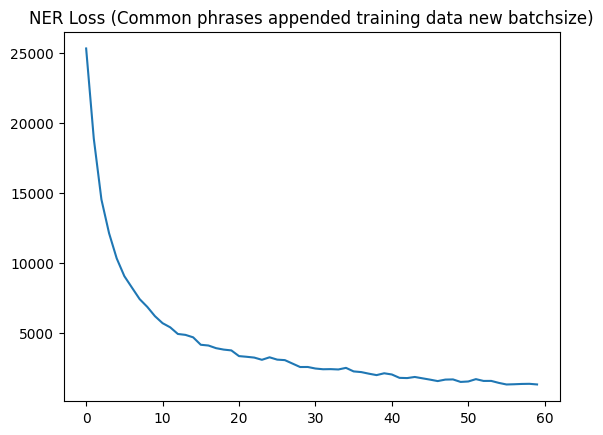

In [ ]:
plt.plot(bt_rates)
plt.title('NER Loss (Common phrases appended training data new batchsize)')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/new batchsize common phrases model loss.jpg')
plt.show()

In [ ]:
bt_output_dir = Path('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/bt_models')

if bt_output_dir is not None:
  bt_output_dir = Path(bt_output_dir)
  if not bt_output_dir.exists():
    bt_output_dir.mkdir()

  bt_nlp.meta['name'] = bt_model_name    #renaming model
  bt_nlp.to_disk(bt_output_dir)
  print('Model is saved to: ', bt_output_dir)

Model is saved to:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/bt_models


In [ ]:
#loading saved model and testing it on TEST DATA
print('Loading model from: ', bt_output_dir)
bt_nlp_2 = spacy.load(bt_output_dir)

bt_scorer = Scorer()

for input_, annotation in tqdm(TEST_DATA):
  doc_gold_text = bt_nlp_2.make_doc(input_)
  gold_example = GoldParse(doc_gold_text, entities = annotation['entities'])
  pred_val = bt_nlp_2(input_)
  bt_scorer.score(pred_val, gold_example)

Loading model from:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/bt_models


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-177-07f0e5d7dbfa>:9: UserWarning:

[W030] Some entities could not be aligned in the text "OBJECTIVE: Congenital long QT syndrome (LQTS) with..." with entities "[(22, 38, 'DISEASEORPHENOTYPICFEATURE'), (40, 44, ...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

<ipython-input-177-07f0e5d7dbfa>:9: UserWarning:

[W030] Some entities could not be aligned in the text "As a primary target for opioid drugs and peptides,..." with entities "[(55, 73, 'GENEORGENEPRODUCT'), (75, 80, 'GENEORGE...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.

  4%|▍         | 4/100 [00:00<00:02, 38.75it/s]<ipython-input-177-07f0e5d7dbfa>:9: UserWarning:

[W030] Some entities could not be aligned in the text "Autism 

In [ ]:
bt_scores = extract_scores(bt_scorer.scores)
bt_scores

{'Metric': ['Precision Score', 'Recall Score', 'F1 Score'],
 'OVERALL': [78.9417, 73.1188, 75.9188],
 'ORGANISMTAXON': [99.115, 96.1373, 97.6035],
 'GENEORGENEPRODUCT': [78.2214, 71.3576, 74.632],
 'DISEASEORPHENOTYPICFEATURE': [74.6212, 66.7797, 70.483],
 'SEQUENCEVARIANT': [76.4368, 74.3017, 75.3541],
 'CHEMICALENTITY': [75.0, 71.8204, 73.3758],
 'CELLLINE': [87.5, 53.8462, 66.6667]}

In [ ]:
pd.DataFrame(bt_scores).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/newbatches.csv')

In [ ]:
bt_performance = px.line(pd.DataFrame(bt_scores), x = 'Metric',
                         y = list(bt_scores.keys())[1:], markers = True,
                         labels = line_labels, color_discrete_map = line_colors,
                         title = 'Performance under common phrases appended training data (new batchsize)')

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/common phrases performance (new batchsize).jpg')
bt_performance.show()

<Figure size 640x480 with 0 Axes>

### Overall metrics comparison

In [ ]:
bench_results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/benchmark.csv')
cp_results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/cpdata.csv')
small_train_results  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/smalltrain.csv')
low_drop_results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/lowdropout.csv')
high_drop_results  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/highdropout.csv')
new_batch_results  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/newbatches.csv')


In [ ]:
all_results = {}    #dictinalry to hold the performance results
all_results['Metric'] = ['Precision', 'Recall', 'F1']    #metrics

#different model experimentations

all_results['Benchmark'] = [bench_results['OVERALL'][x] for x in range(3)]
all_results['Common Phrases'] = [cp_results['OVERALL'][x] for x in range(3)]
all_results['Small train size'] = [small_train_results['OVERALL'][x] for x in range(3)]
all_results['Low dropout'] = [low_drop_results['OVERALL'][x] for x in range(3)]
all_results['High dropout'] = [high_drop_results['OVERALL'][x] for x in range(3)]
all_results['Best model'] = [new_batch_results['OVERALL'][x] for x in range(3)]


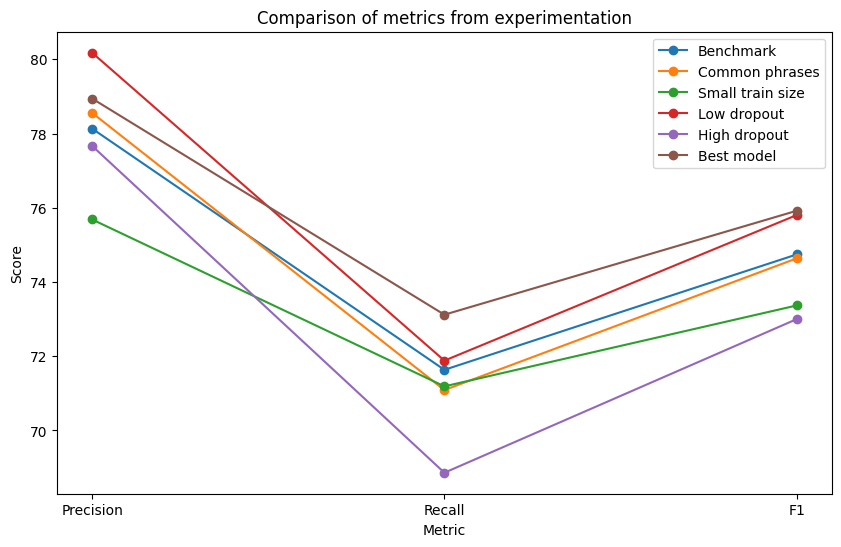

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(all_results['Metric'], all_results['Benchmark'], marker = 'o',label='Benchmark')
plt.plot(all_results['Metric'], all_results['Common Phrases'], marker = 'o', label='Common phrases')
plt.plot(all_results['Metric'], all_results['Small train size'], marker = 'o', label='Small train size')
plt.plot(all_results['Metric'], all_results['Low dropout'], marker = 'o', label='Low dropout')
plt.plot(all_results['Metric'], all_results['High dropout'], marker = 'o', label='High dropout')
plt.plot(all_results['Metric'], all_results['Best model'], marker = 'o', label='Best model')

plt.legend(loc=0)
plt.title('Comparison of metrics from experimentation')
plt.xlabel('Metric')
plt.ylabel('Score')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/training figures/overall comparison.jpg')
plt.show()

## Using the best version of model hyperparameters and dataset to prepare the graph construction

<p align = justify>In this research, the combination of the common phrases appended training data and a narrow start-end gap with slightly higher compounding rate yeilded the best results, both metrics and time to train, thus, this version of the model will be used to extract the entities from the test dataset to construct the graph.</p>

In [ ]:
#directory to best model
best_model_output_dir = Path('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/bt_models')

#loading best saved model
print('Loading model from: ', best_model_output_dir)
best_nlp = spacy.load(best_model_output_dir)

Loading model from:  /content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/bt_models


In [ ]:
extracted_ents = []            #list to contain predicted entity name and entity type
search_ents = []               #list to contain predicted entity names per abstract

for an_abstract in tqdm(TEST_DATA):
  pred_doc = best_nlp(an_abstract[0])                 #predicting the entities

  temp_ents = []               #list to contain the entities of an abstract

  for ent in pred_doc.ents:
    temp_ents.append(ent.text.upper())     #add entity name to temporary entity list
    extracted_ents.append((ent.text.upper(), ent.label_))    #add entity name and type to list

  search_ents.append(temp_ents)            #add entity names of current abstract to search_ents

#write an entity name and type csv to create nodes of the graph

#pd.DataFrame(extracted_ents, columns=['Name', 'Type']).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/for graph/nodes.csv')
pd.DataFrame(extracted_ents, columns=['entName', 'entType']).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/for graph/2nodes.csv')

100%|██████████| 100/100 [00:02<00:00, 45.18it/s]


In [ ]:
annotation_rels = []               #list to contain entities and thier relationship

for an_abstract in tqdm(test_re):                 #loop over test set that has relationship annotations
  the_text = an_abstract[0]                       #to extract the entity names and thier relationships
  the_rels = an_abstract[1]['relations']

  temp_rels = []                   #list to contain relationships of the current abstract

  for z in the_rels:
    #add the first entity, second entity, their relationship to temp_rels
    temp_rels.append((the_text[z[0]:z[1]].upper(), the_text[z[2]:z[3]].upper(), z[4]))

  annotation_rels.append(temp_rels)     #add temp_rels once done with current abstract

100%|██████████| 100/100 [00:00<00:00, 15983.78it/s]


In [ ]:
attached_rels = []                           #list to contain relationships to be created in graph
not_detected = []
rels_cols = ['StartEnt', 'Relationship', 'EndEnt']

for ents_, rels_ in tqdm(zip(search_ents, annotation_rels)):
  for rel in rels_:
    #add the relationship to attached_rels list if and only if both entities
    #involved are extracted, else add the relationship to not_detected list

    if (rel[0] in ents_) and (rel[1] in ents_):
      attached_rels.append((rel[0], rel[2], rel[1]))

    else:
      not_detected.append((rel[0], rel[2], rel[1]))

#write the relationship csv to create relationships of the graph

#pd.DataFrame(attached_rels, columns = rels_cols).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/for graph/relationships.csv')
pd.DataFrame(attached_rels, columns = rels_cols).to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Research Project - B9AI107/for graph/2relationships.csv')

100it [00:00, 28491.98it/s]


In [ ]:
#print('Out of the total 952 relationships in the test dataset, {} were attacted, and {} were not attacted'.format(len(attached_rels),len(not_detected)))

Out of the total 952 relationships in the test dataset, 636 were attacted, and 316 were not attacted


In [ ]:
#running predictions for the second time
print('Out of the total 952 relationships in the test dataset, {} were attacted, and {} were not attacted'.format(len(attached_rels),len(not_detected)))

Out of the total 952 relationships in the test dataset, 636 were attacted, and 316 were not attacted


<p align=justify>
Change some of the entity names in the csv file because the application formats and converts them incorrectly, some become formulas, e.g, a SEQUENCE =-II is treated as a formula, while a GENE OCT4 was handled as a date. Thus postprocessing was done on the csv file, add a single quote mark " ' " to such names for the app to correctly handle and treat as string